In [1]:
'''
Description
Author: David Brin
Date created 9/23/24

This notebook uses "A_LFP_analysis_functions.py" for all imports and functions necessary for analysis. 
This notebook shows the raw and fitted power spectra from preprocessed LFP recordings, spatial spike activity along with active windows,
and the raw and fitted spectra of active windows, along with the distribution and variation of aperiodic and peak parameters. 
'''

'\nDescription\nAuthor: David Brin\nDate created 9/23/24\n\nThis notebook uses "A_LFP_analysis_functions.py" for all imports and functions necessary for analysis. \nThis notebook shows the raw and fitted power spectra from preprocessed LFP recordings, spatial spike activity along with active windows,\nand the raw and fitted spectra of active windows, along with the distribution and variation of aperiodic and peak parameters. \n'

In [2]:
%run "./A_LFP_analysis_functions.py"

C:\Users\david\Documents\Voytek Research\psychedelic_organoids\PlateA\A_LFP_analysis_functions.py:54: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [3]:
lfp_data = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateA\PlateA_D20\d20_lfp_data.h5")
spike_times = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateA\PlateA_D20\spike_data_10min.mat")

(2, 3, 60850)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])


## Full power spectra

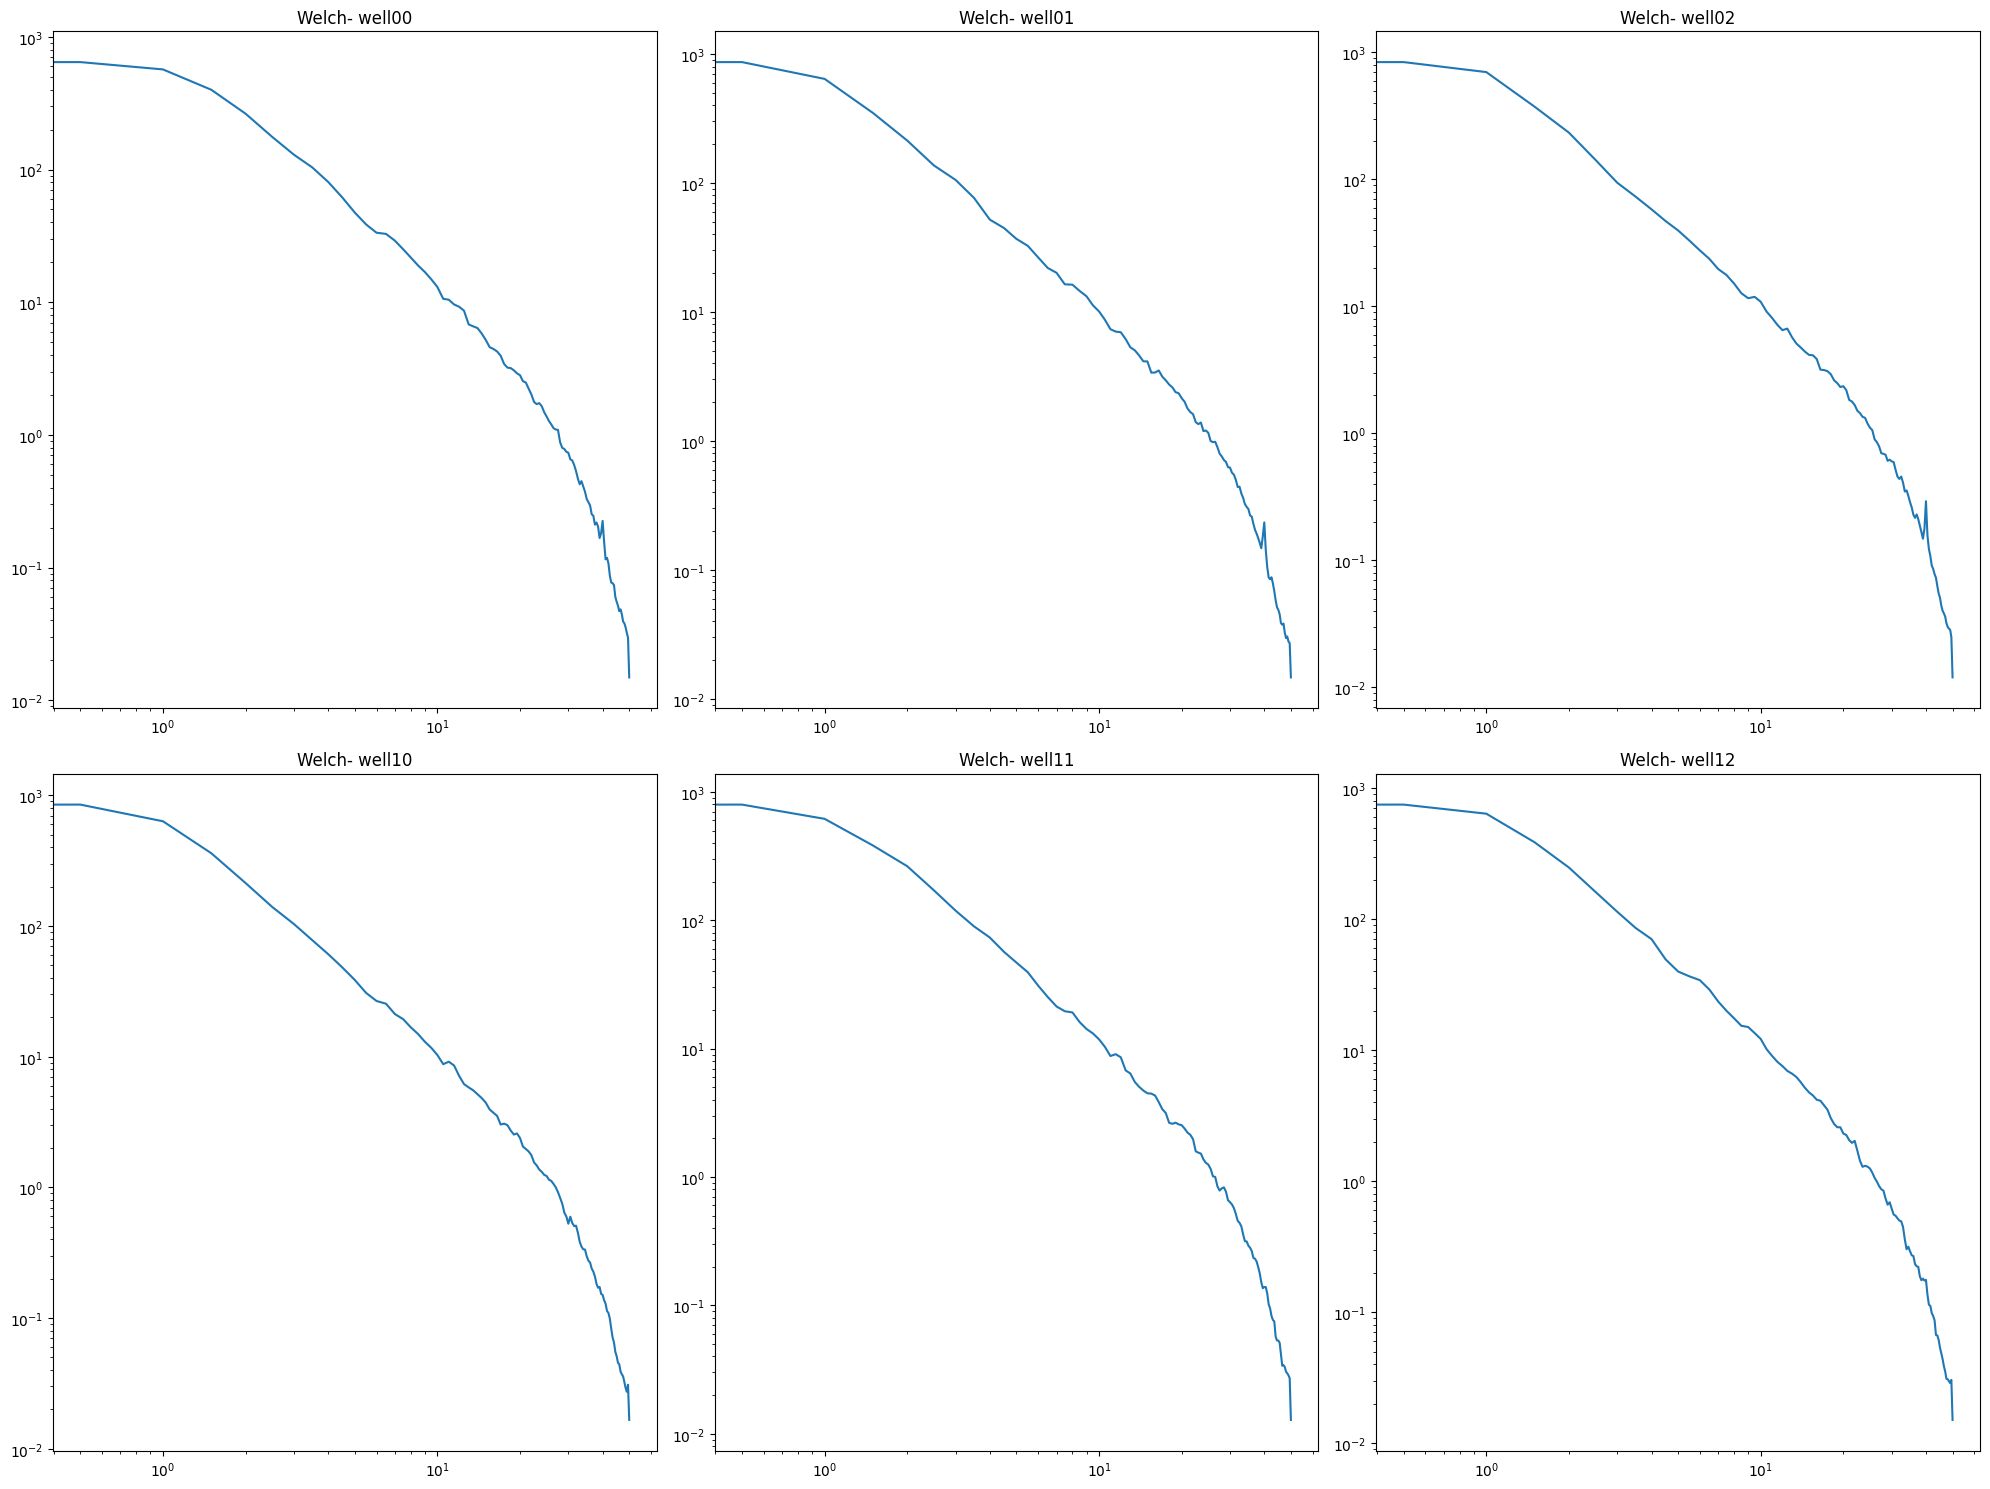

In [4]:
 plot_all_pspectra(lfp_data)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

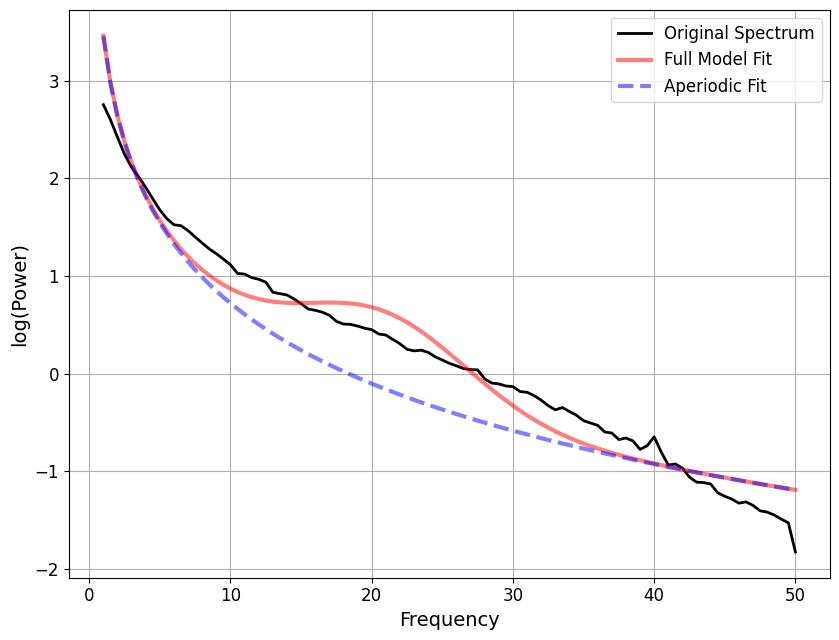

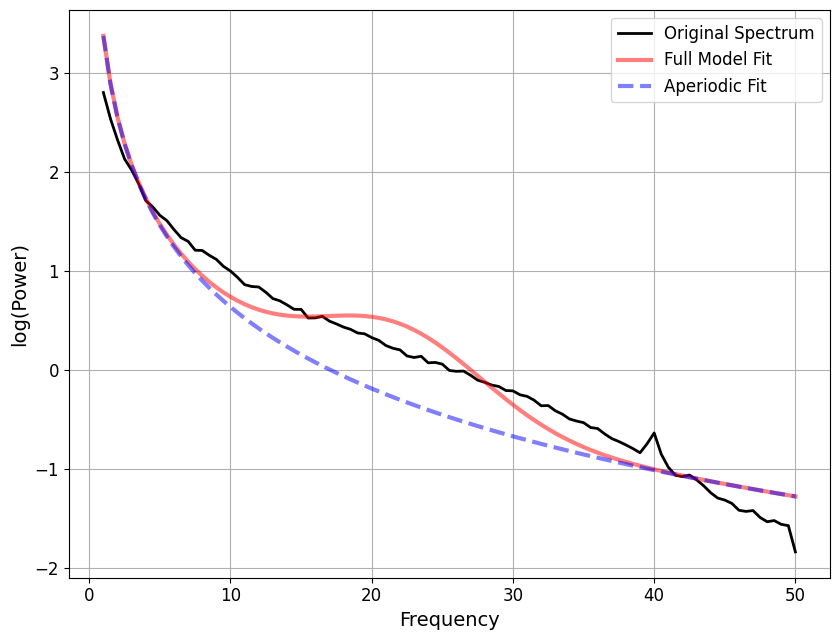

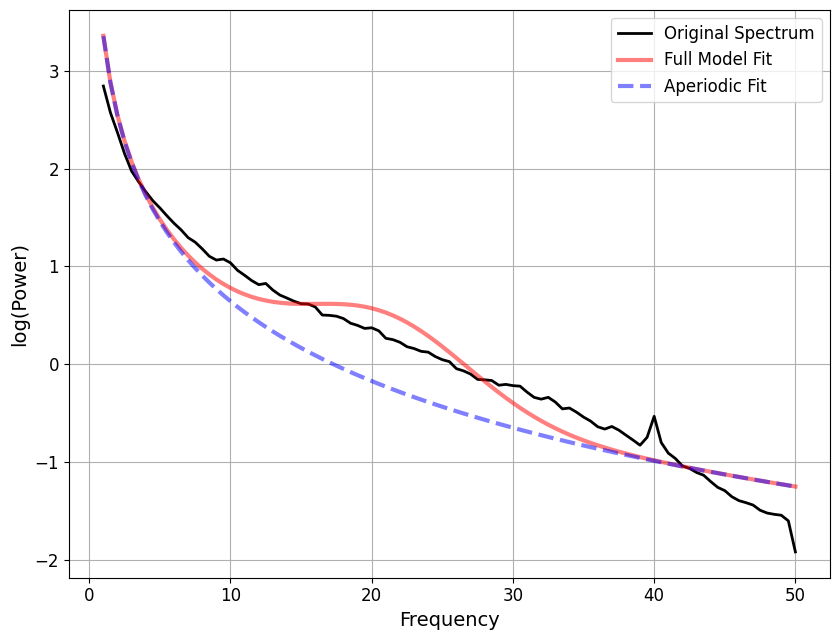

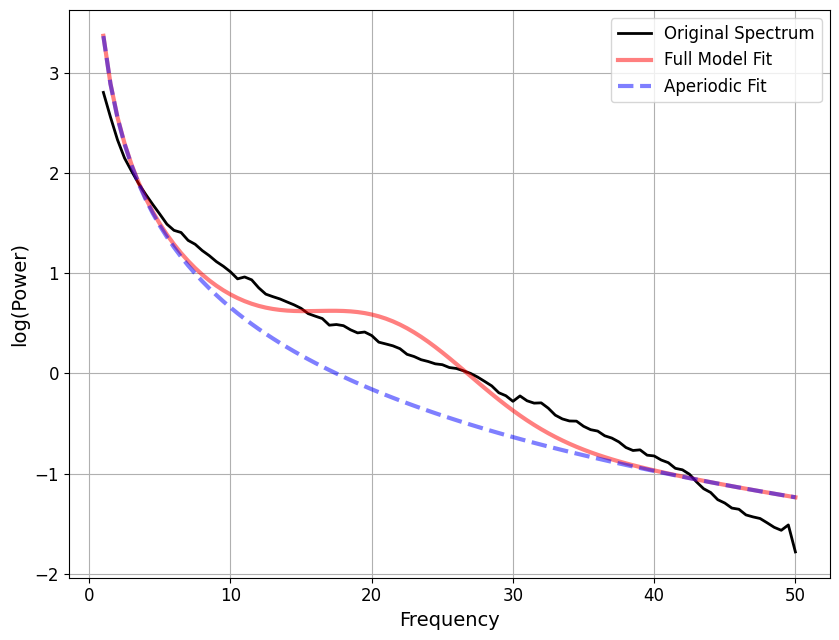

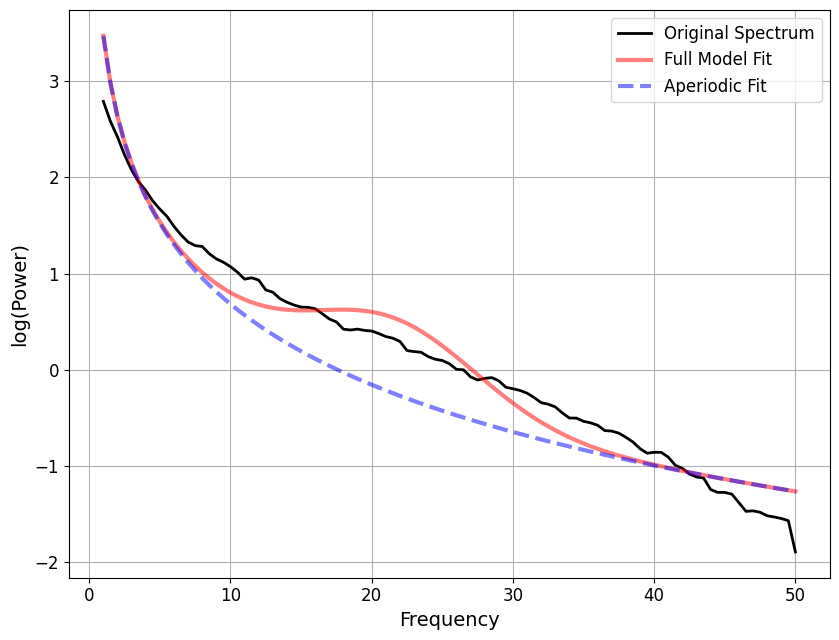

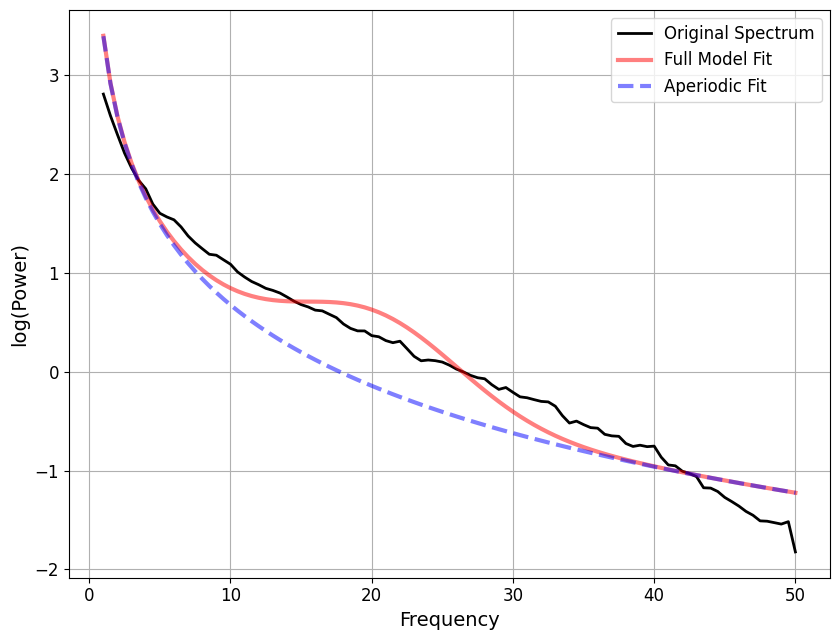

In [5]:
fooof_all_pspectra(lfp_data, fs_ds = 100, fmode = "fixed")

## Spike Activity

### Spacial activity

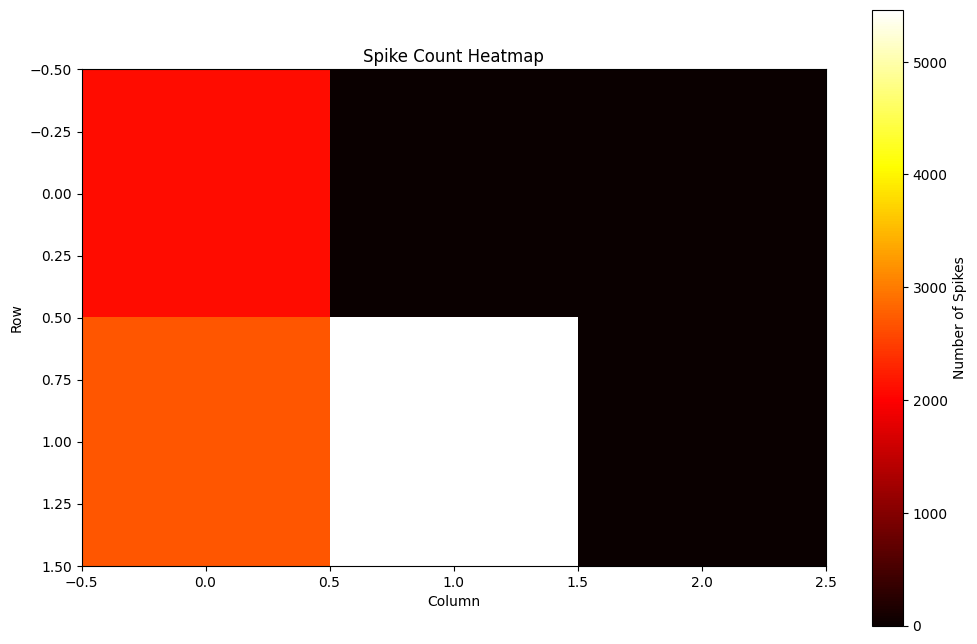

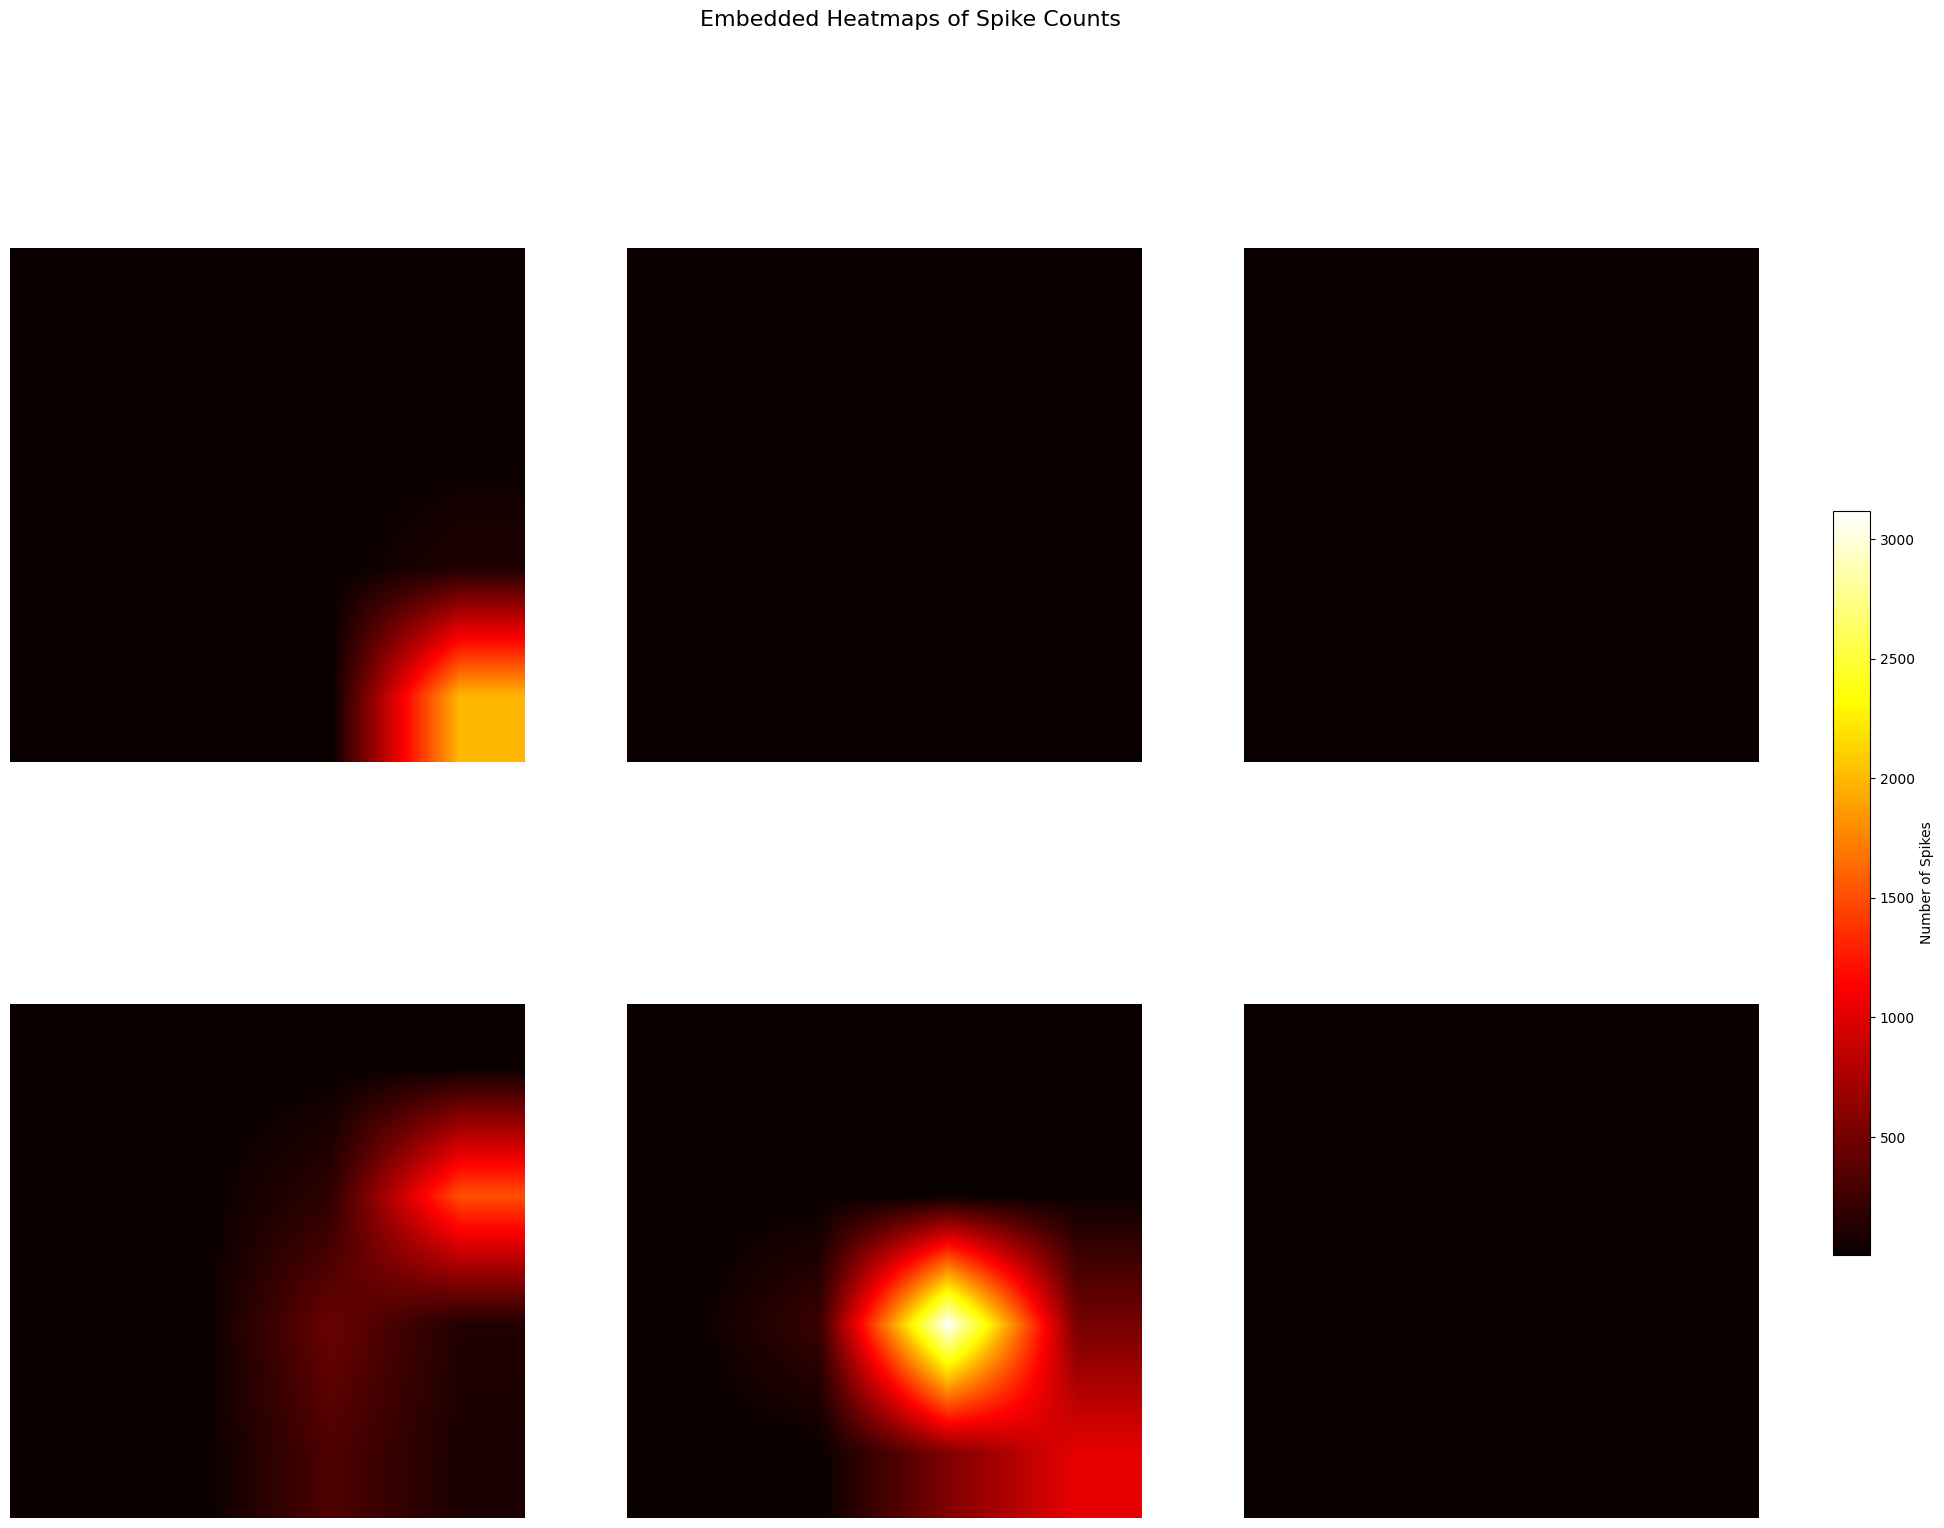

In [6]:
spike_spacial_visualization(spike_times)

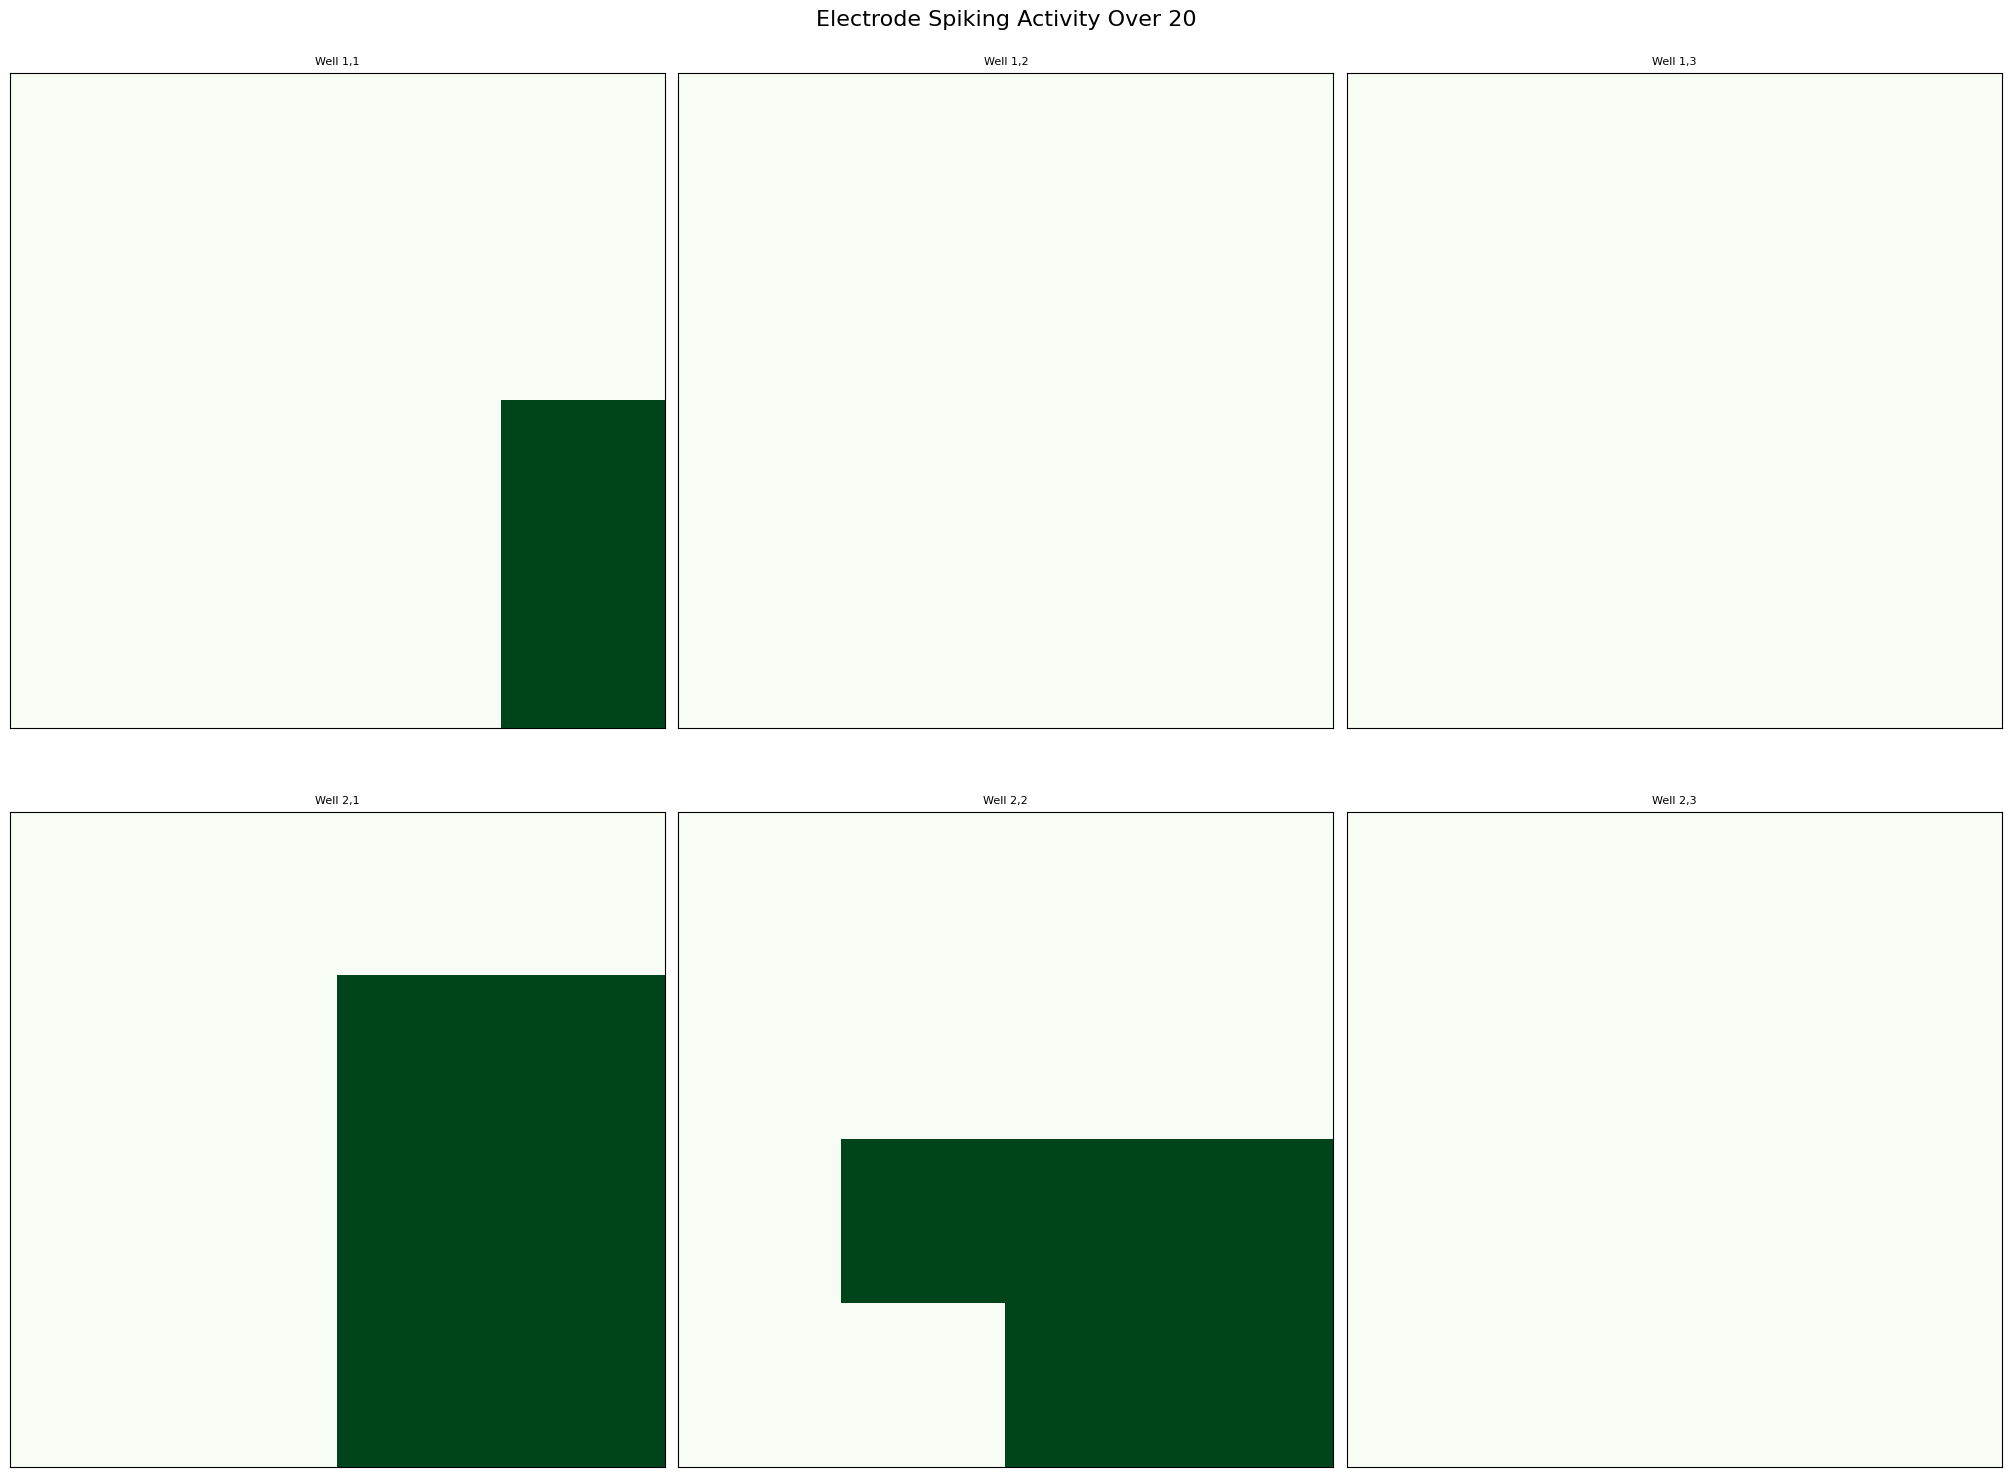

In [7]:
 spike_threshold_vis(spike_times)

### Temporal activity

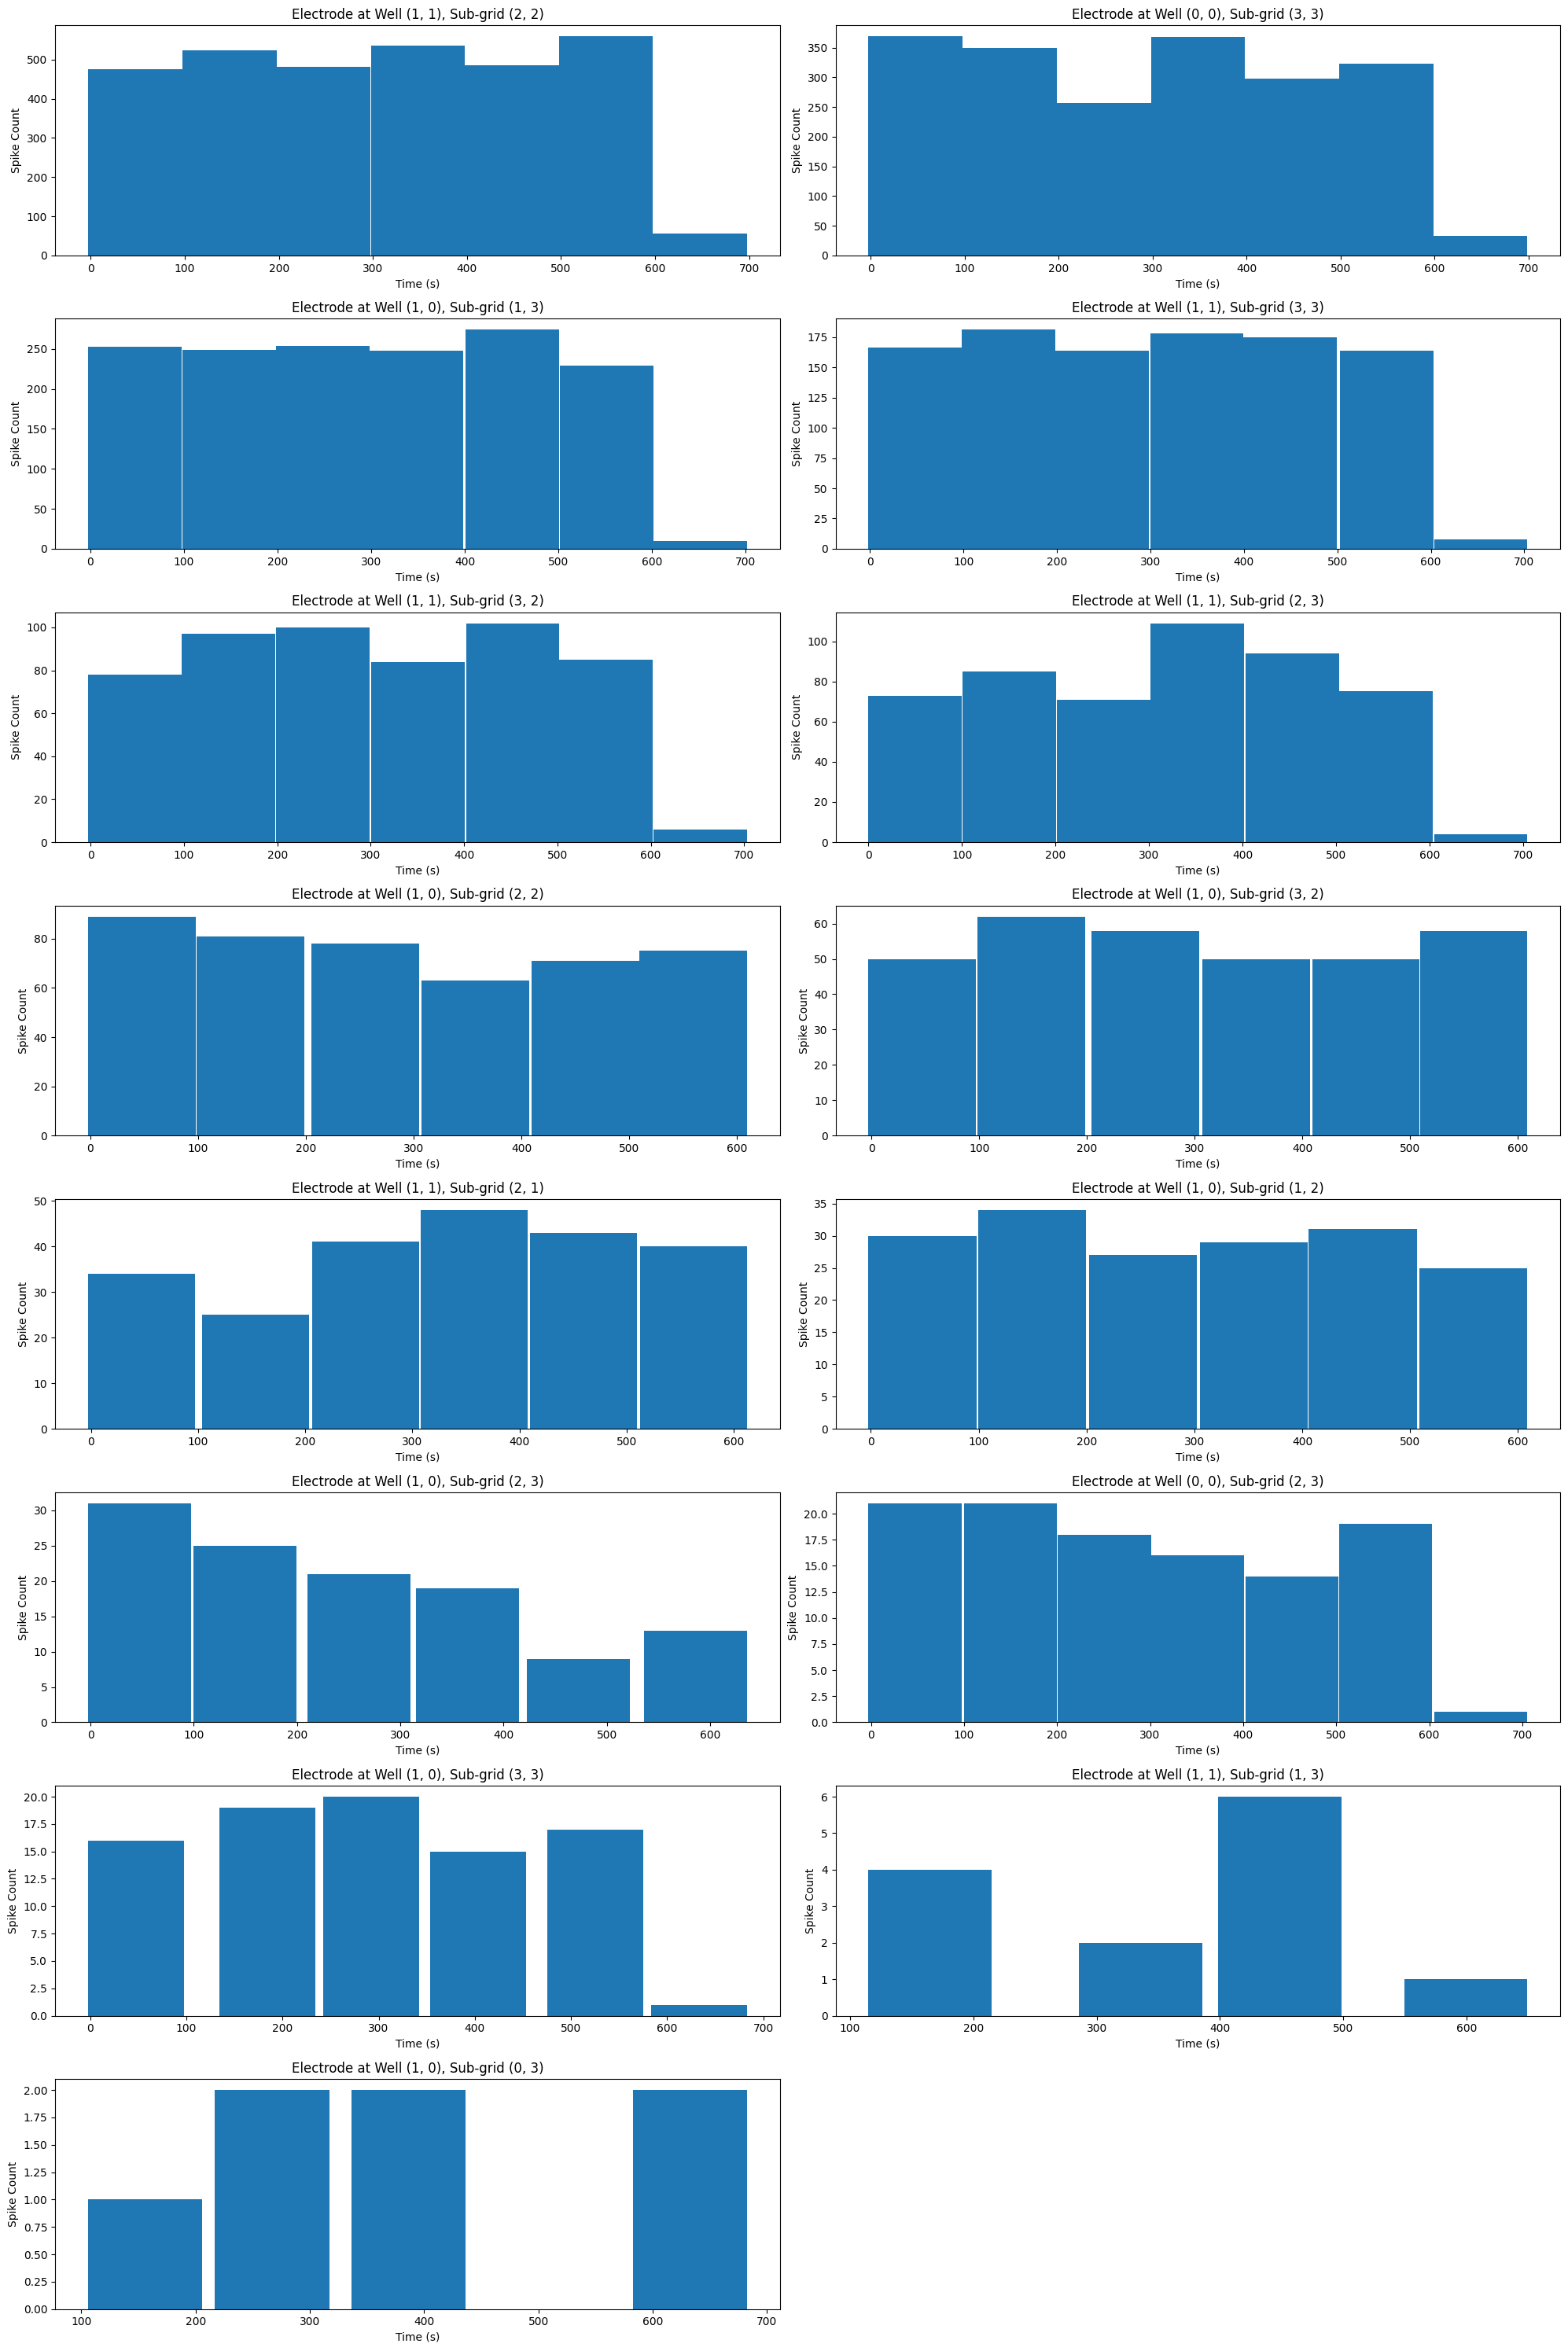

In [8]:
find_and_plot_active_spike_windows(spike_times, 100)

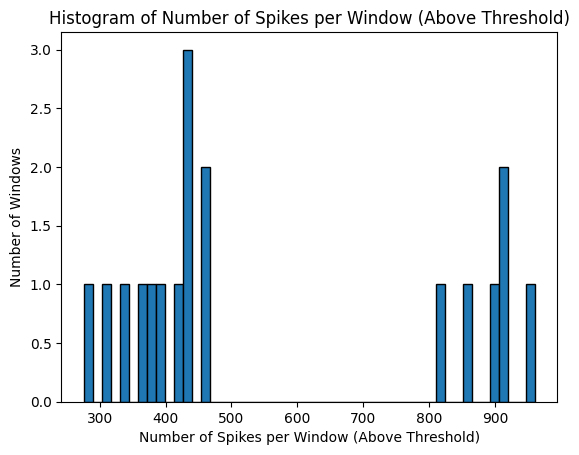

In [9]:
spike_times_by_well = spikes_by_well(spike_times)
binary_activity = plot_num_spikes_hist(spike_times_by_well, 100, num_windows = 6, threshold = 50) 
#plots histogram of windows above 50 spikes and creates binary_activity

## Windowed analysis

fitting all 100s active windows per well
fitting well 0,0 0:100

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                         

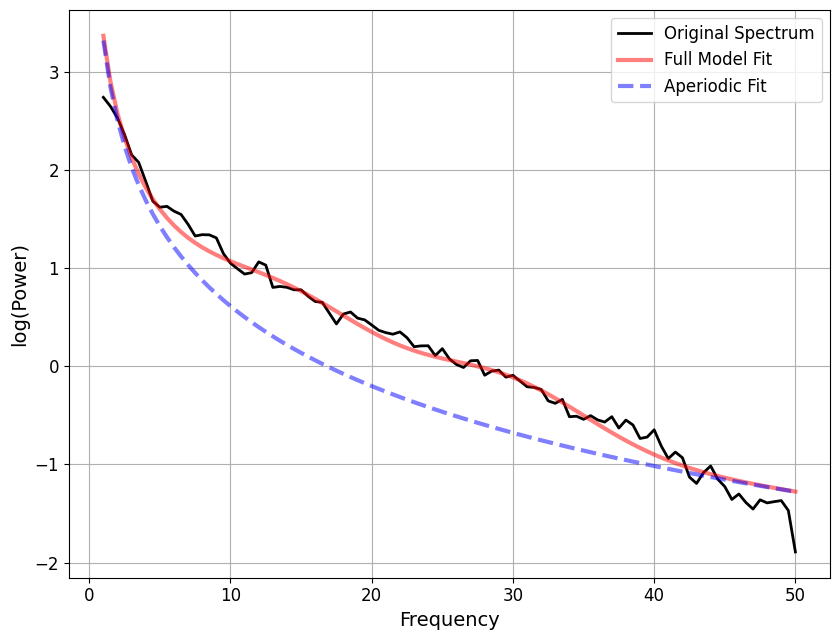

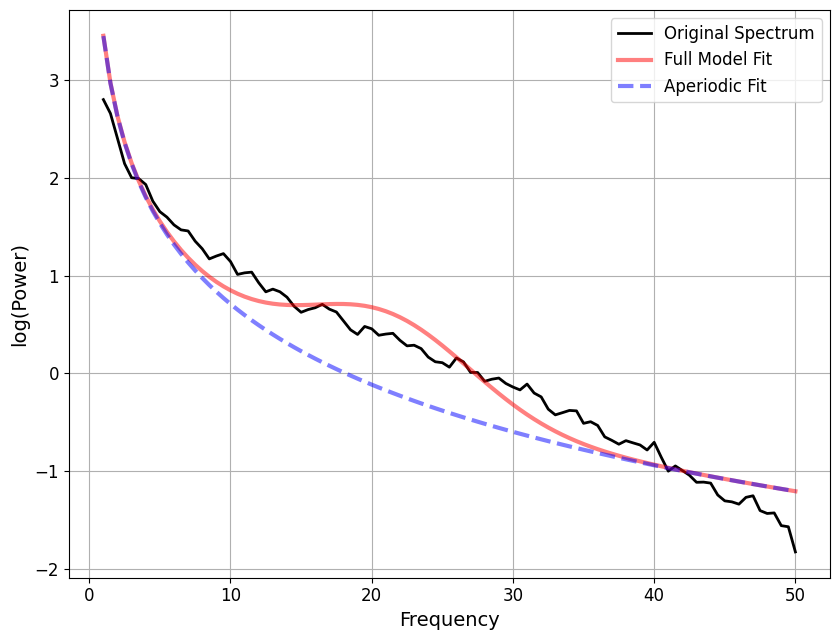

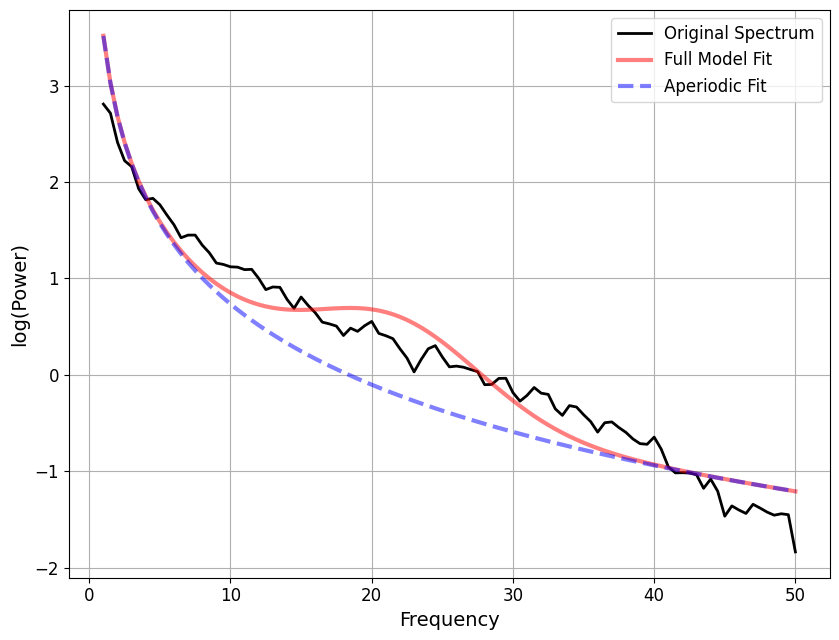

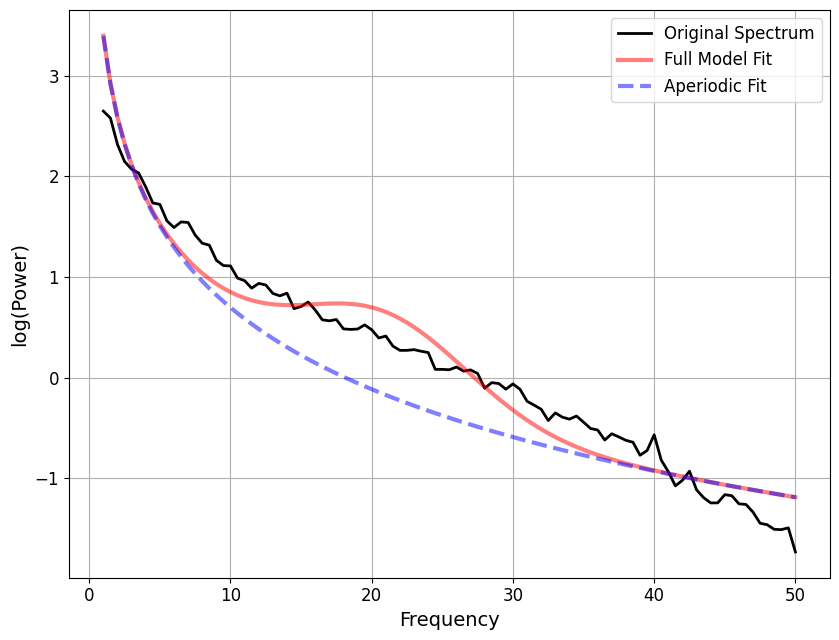

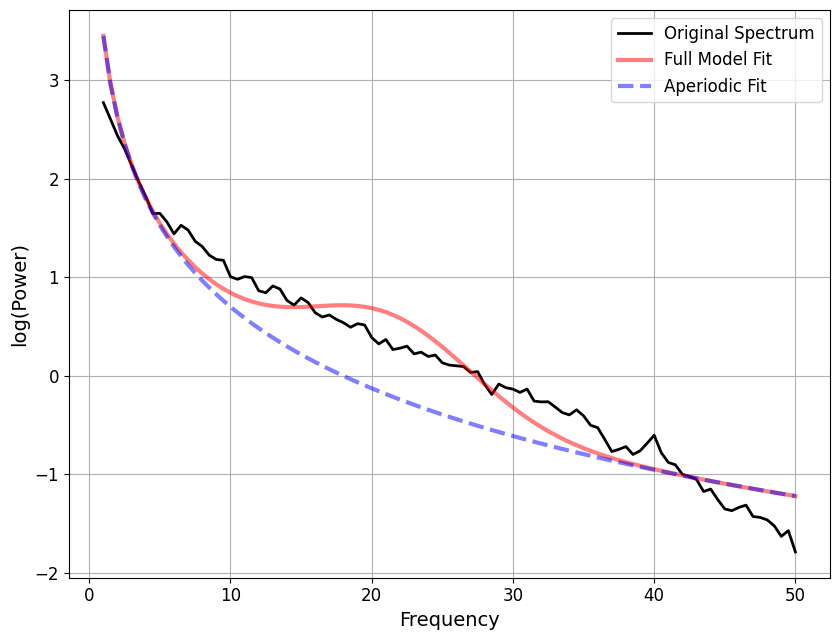

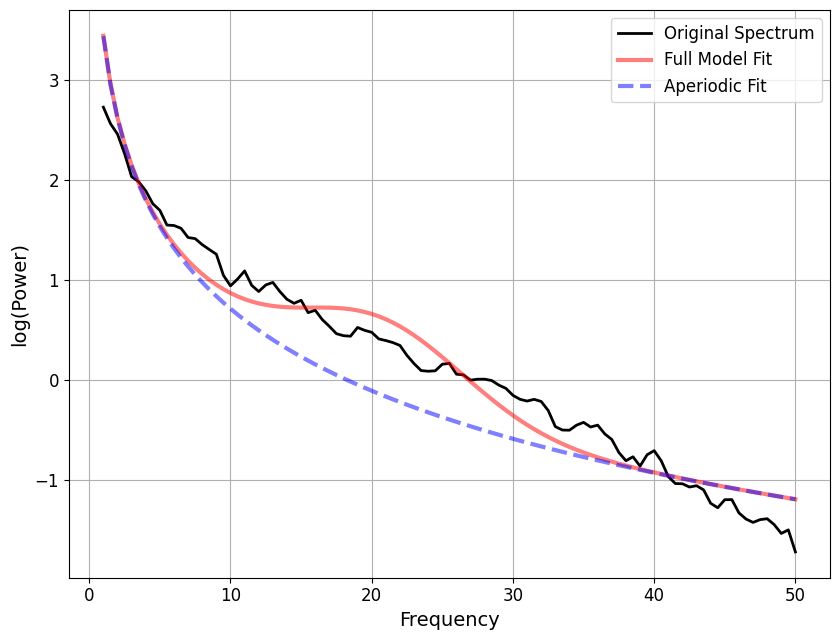

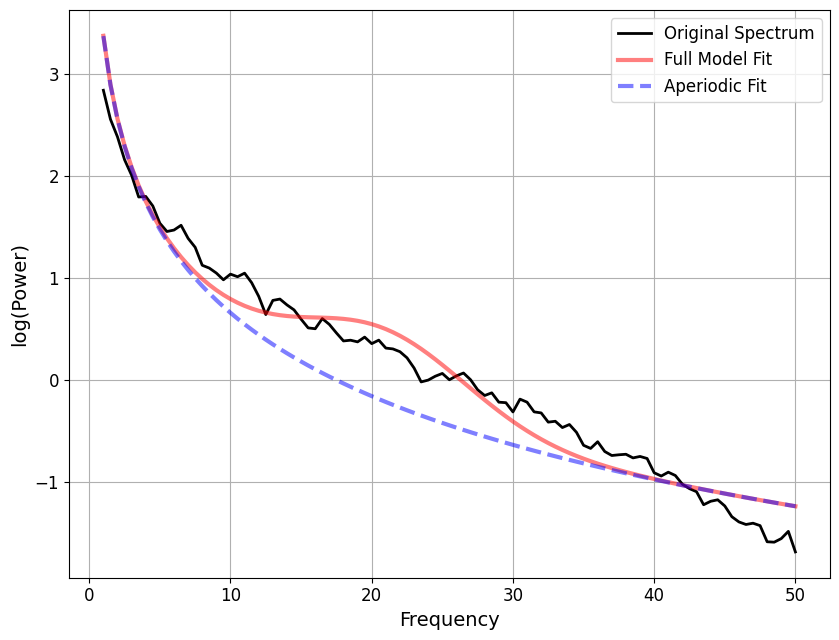

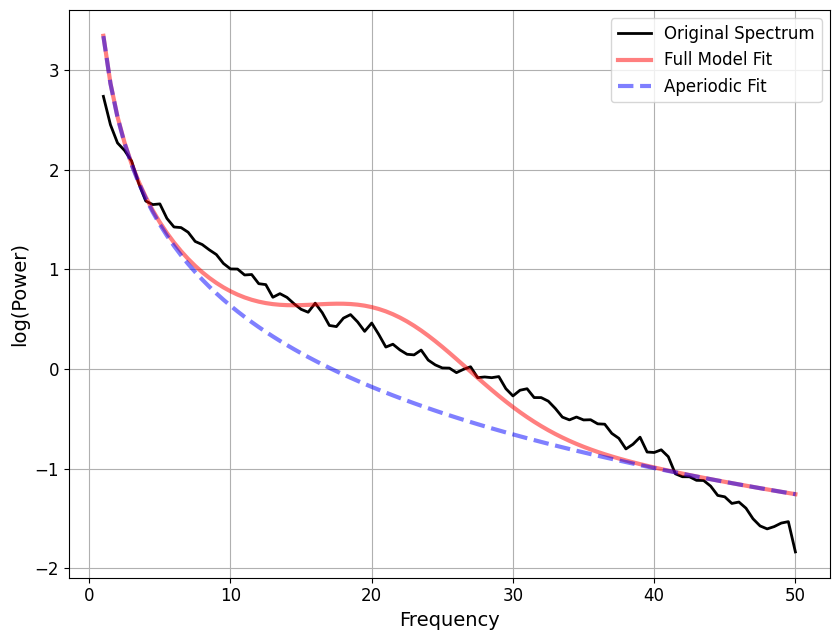

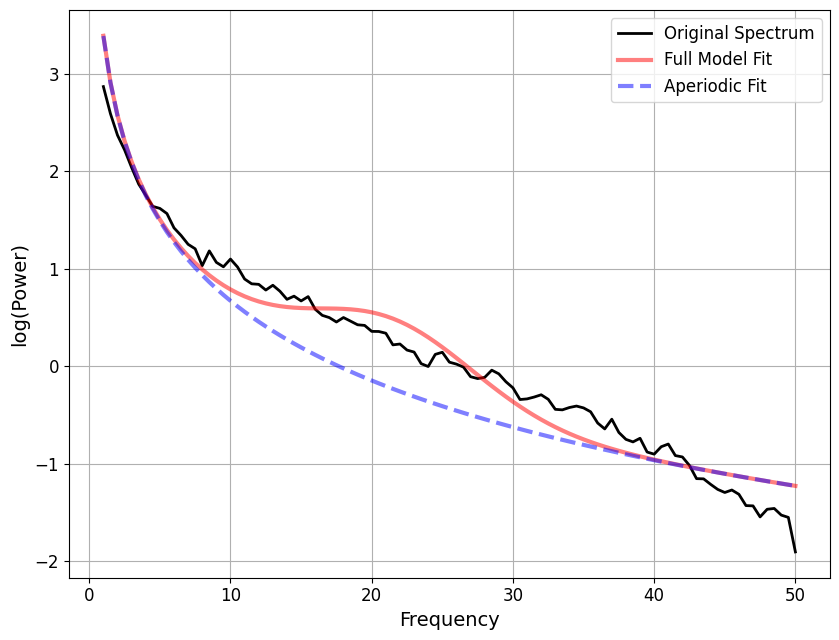

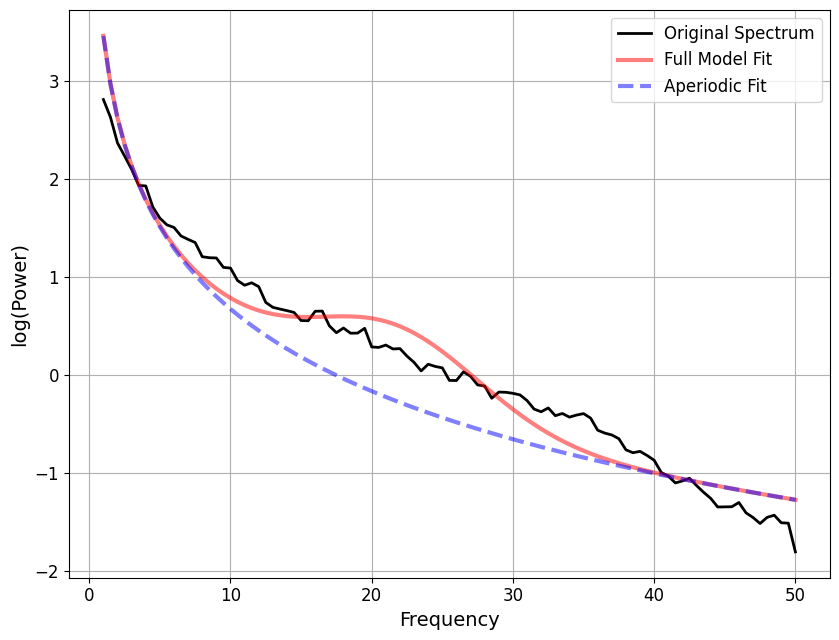

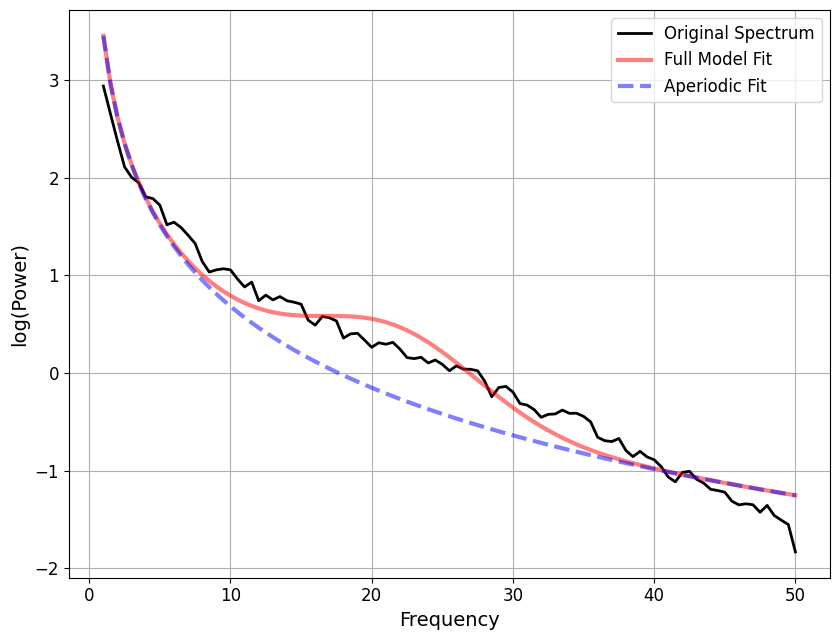

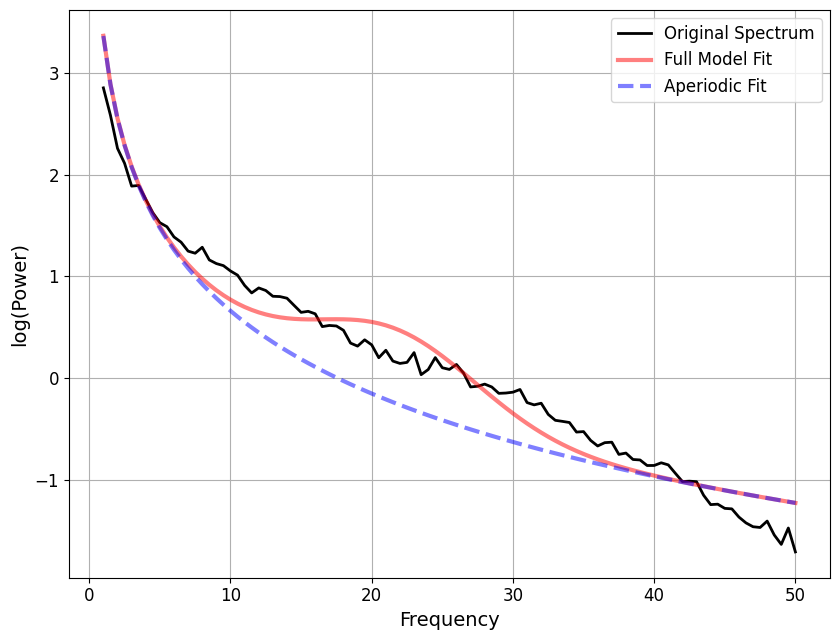

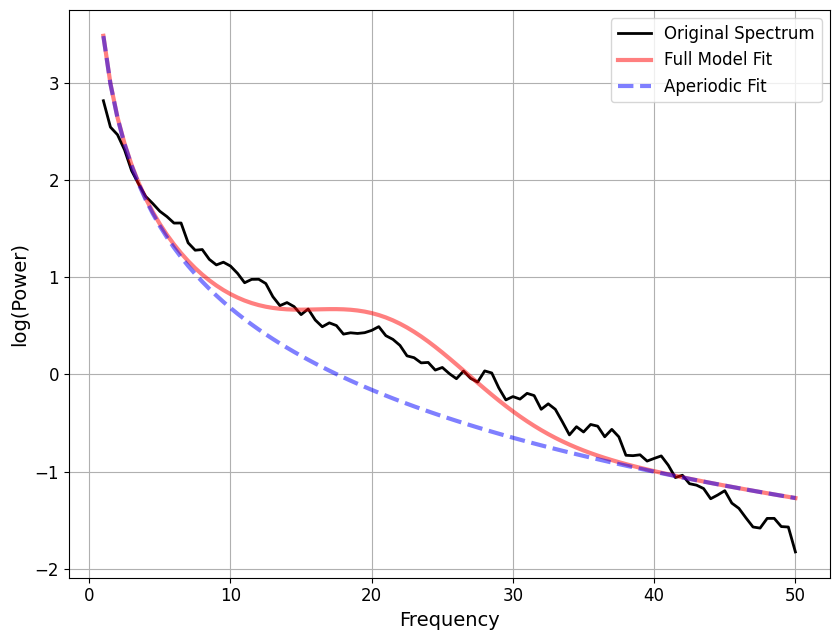

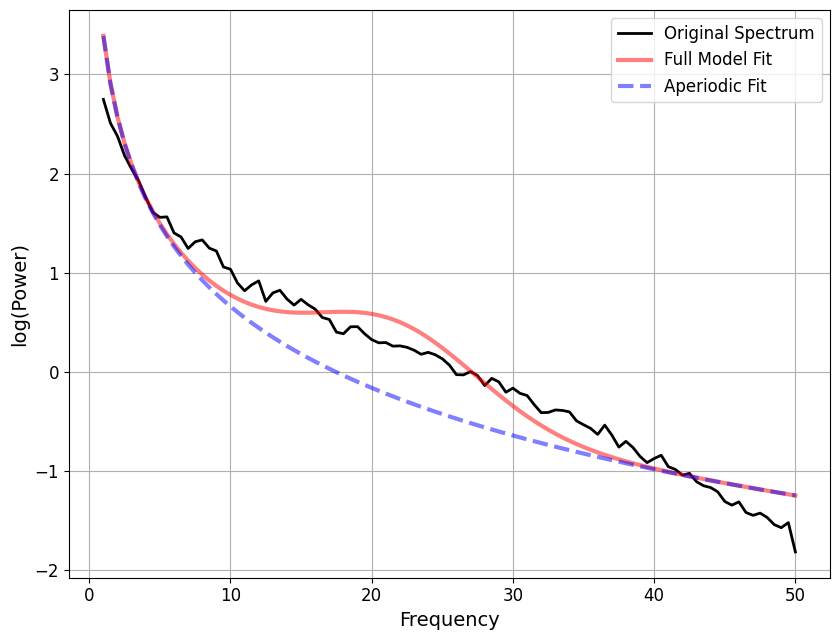

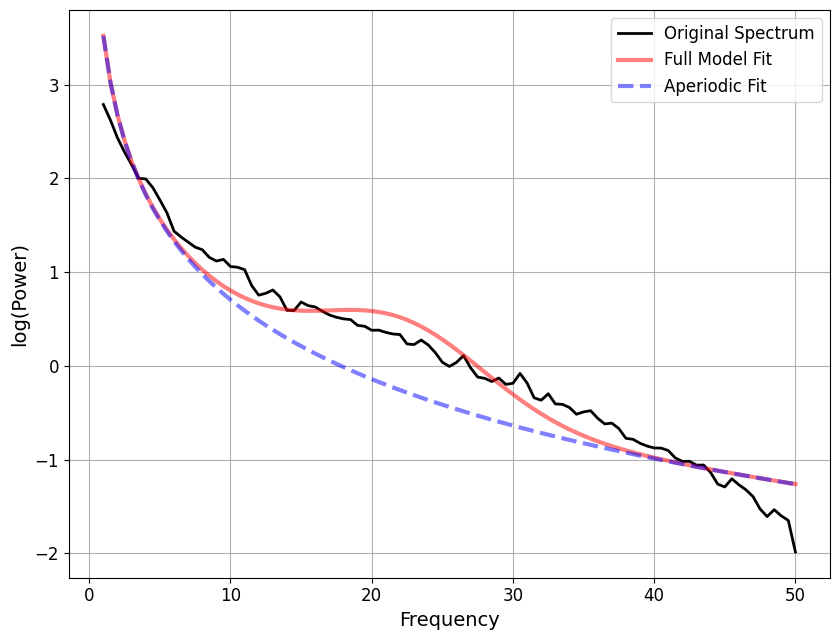

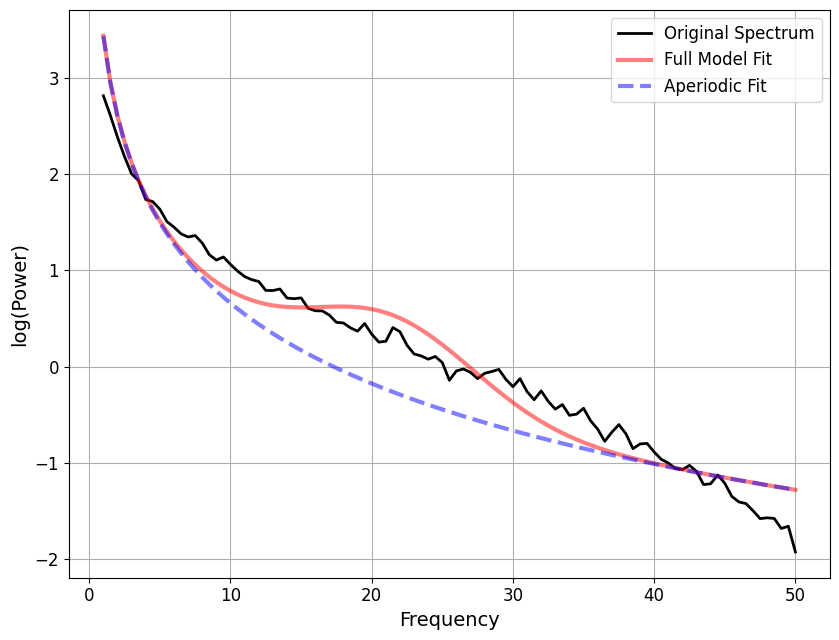

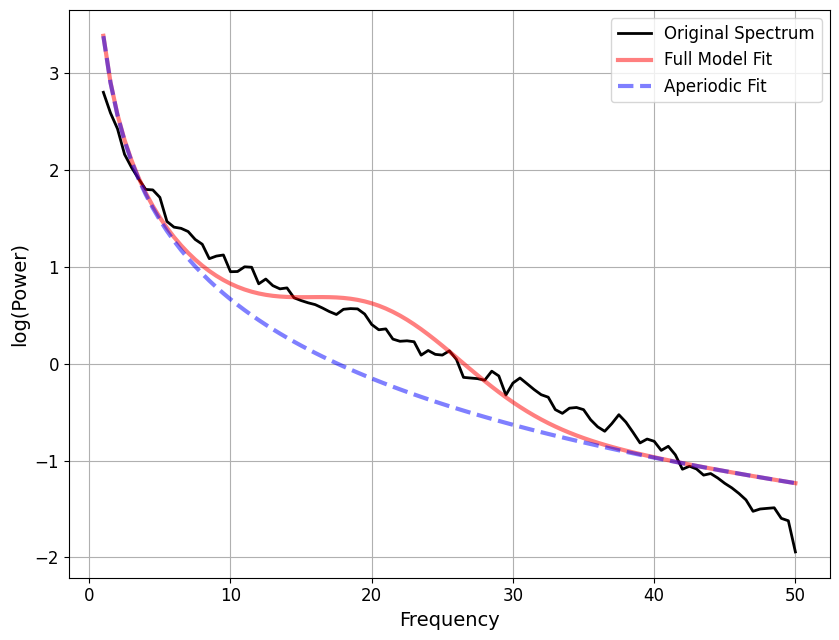

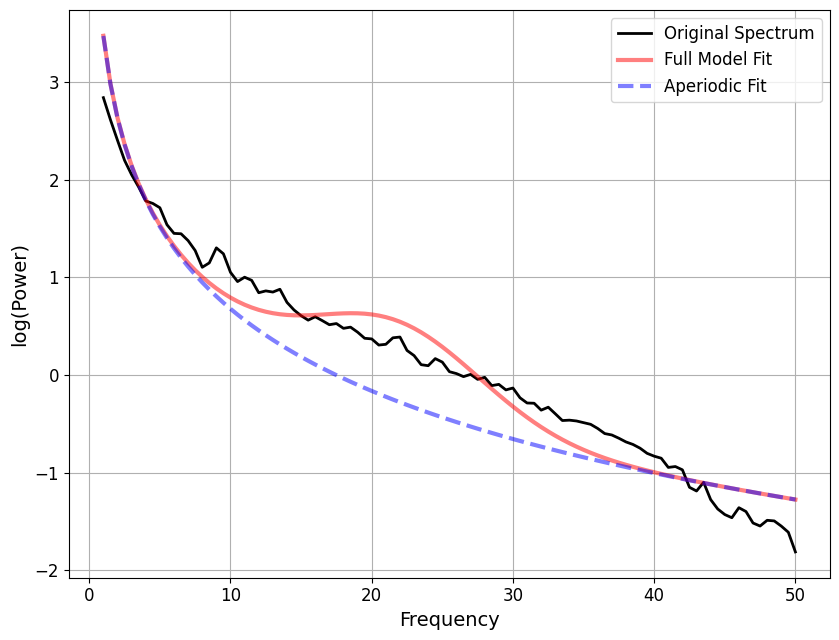

In [10]:
fooof_wind_thresh(binary_activity, lfp_data, 100, fmode = "fixed")

fitting all 100s active windows per well
fitting well 0,0 0:100
fitting well 0,0 100:200
fitting well 0,0 200:300
fitting well 0,0 300:400
fitting well 0,0 400:500
fitting well 0,0 500:600
fitting well 1,0 0:100
fitting well 1,0 100:200
fitting well 1,0 200:300
fitting well 1,0 300:400
fitting well 1,0 400:500
fitting well 1,0 500:600
fitting well 1,1 0:100
fitting well 1,1 100:200
fitting well 1,1 200:300
fitting well 1,1 300:400
fitting well 1,1 400:500
fitting well 1,1 500:600


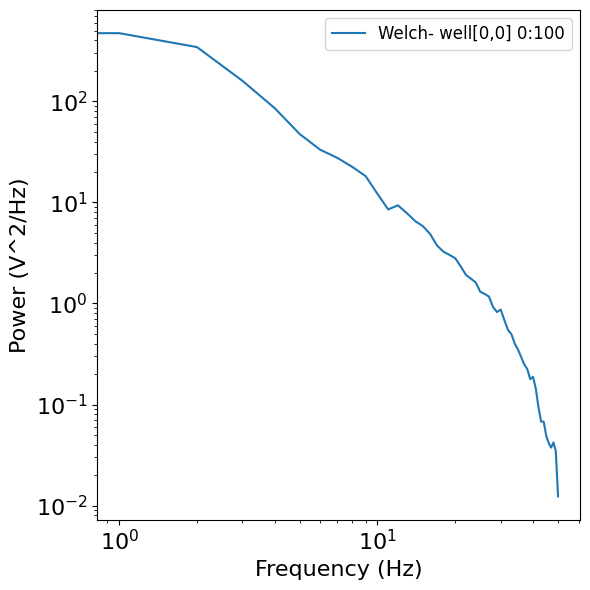

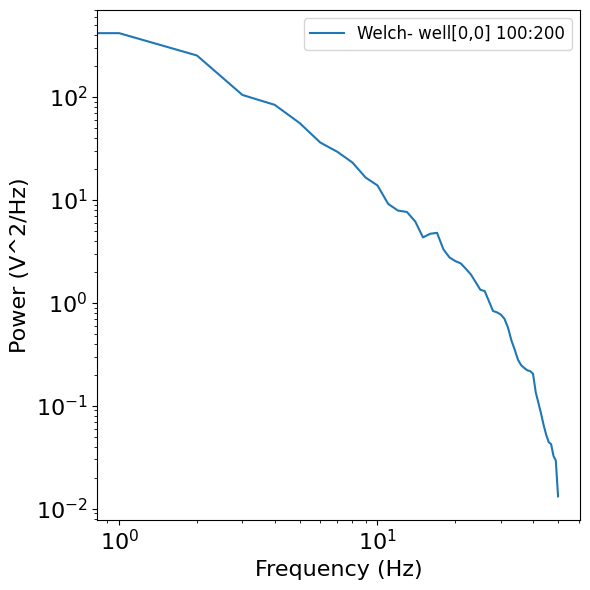

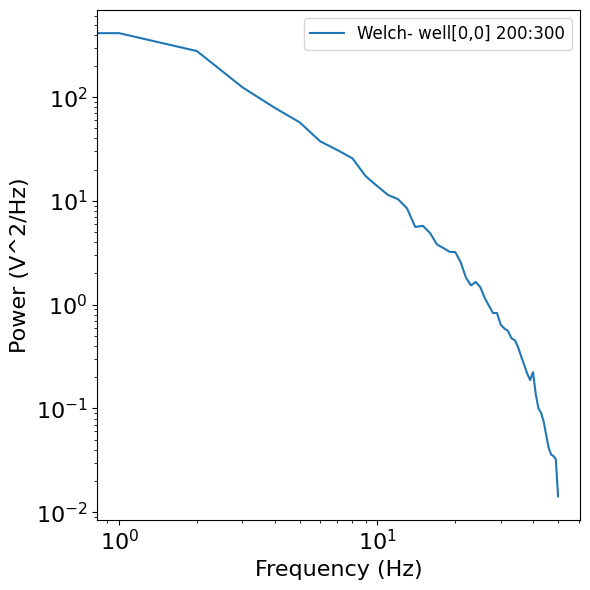

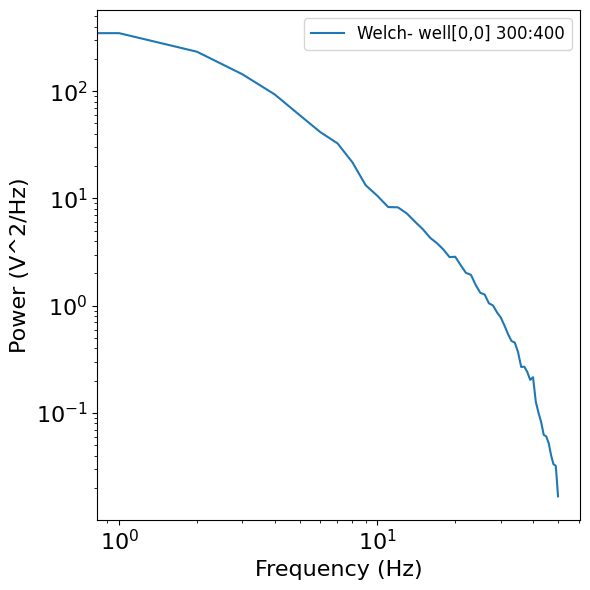

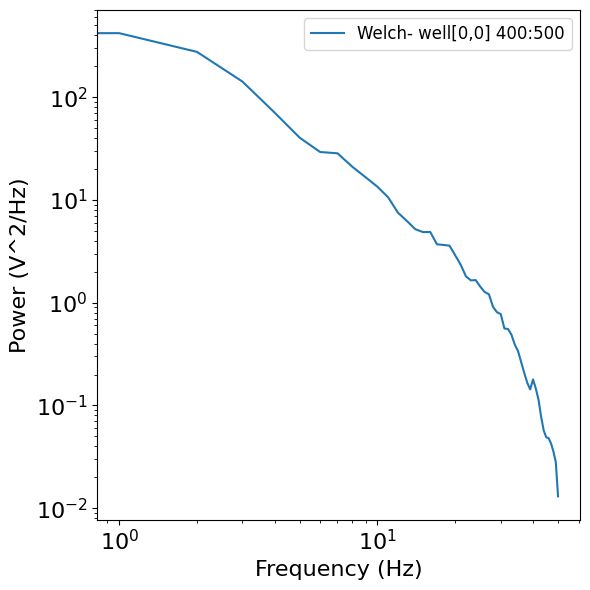

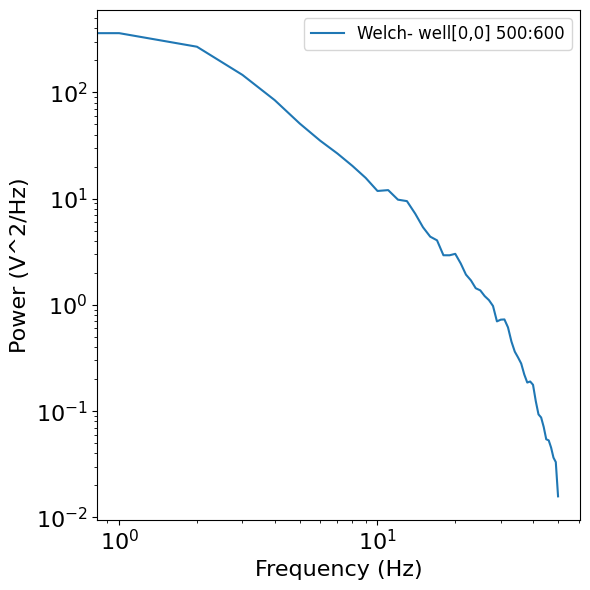

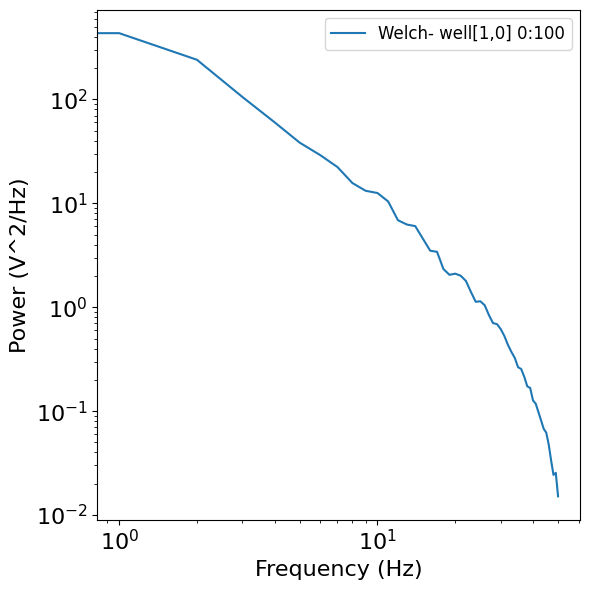

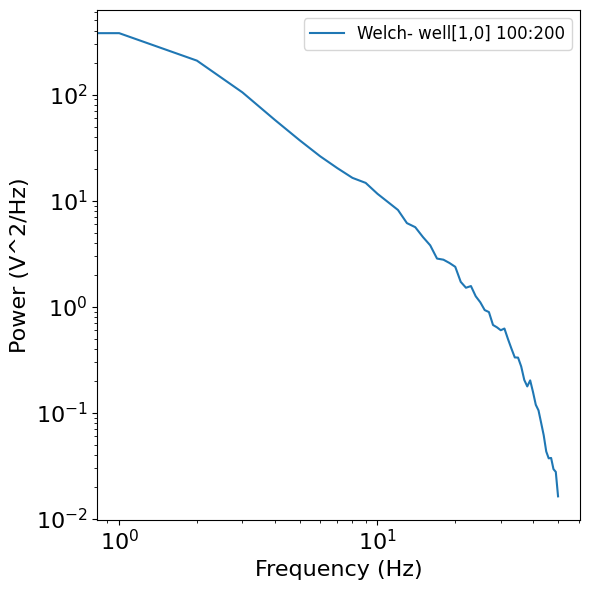

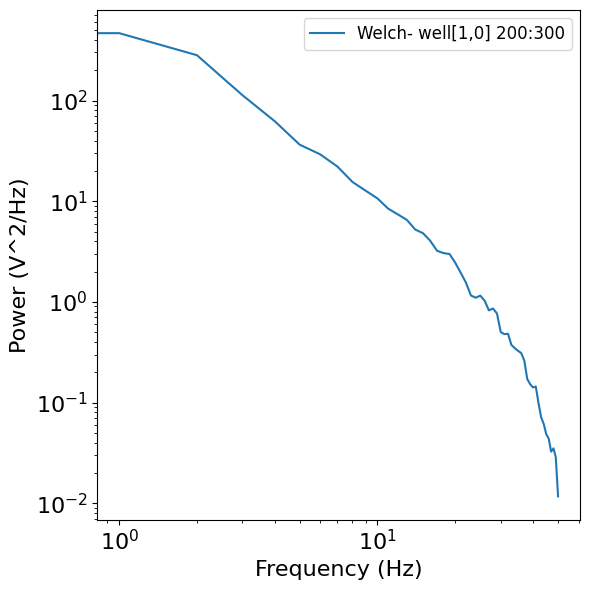

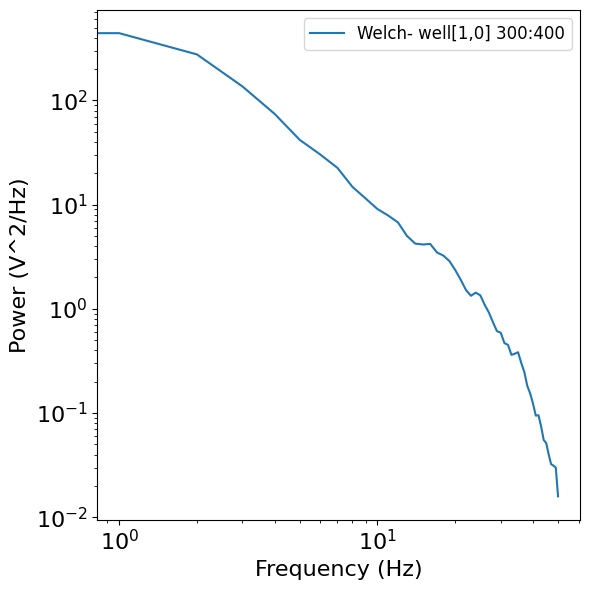

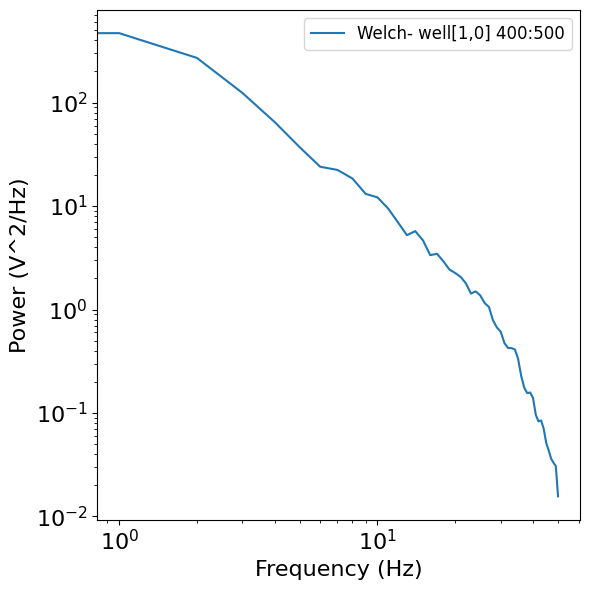

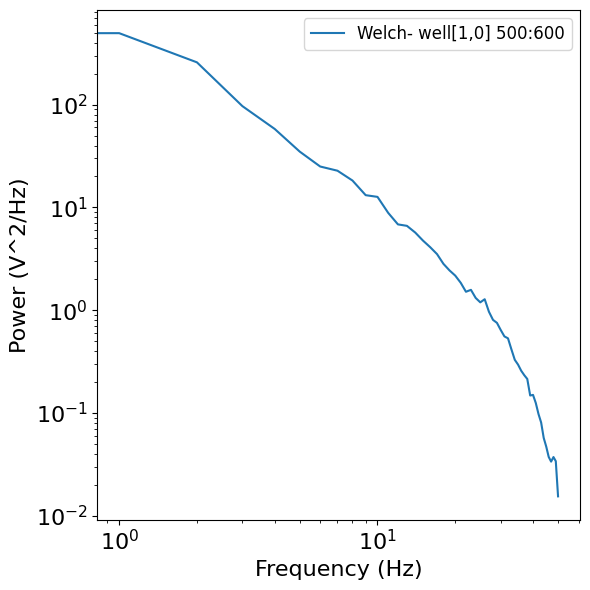

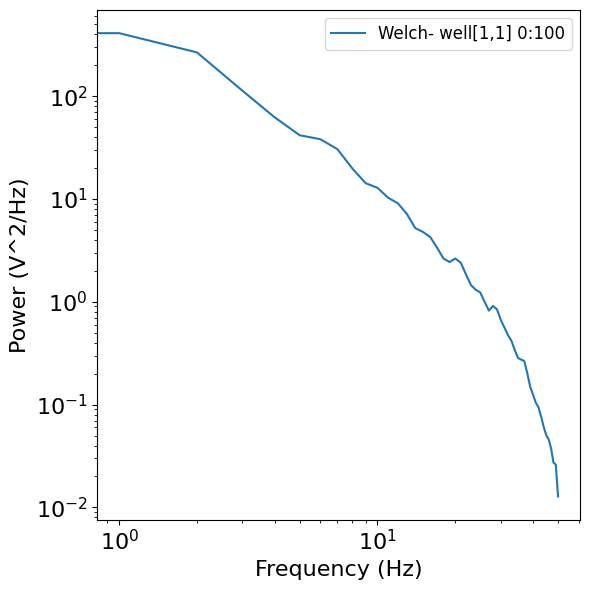

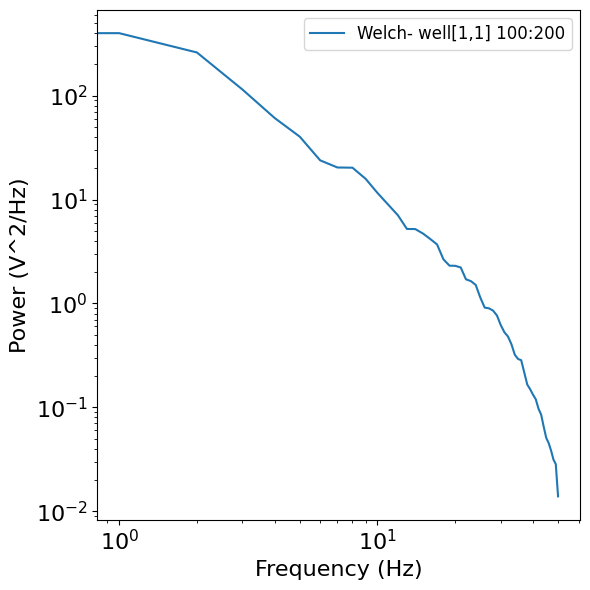

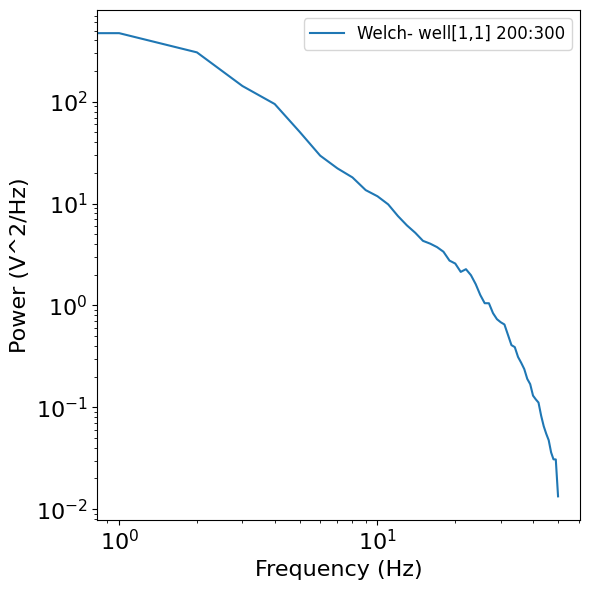

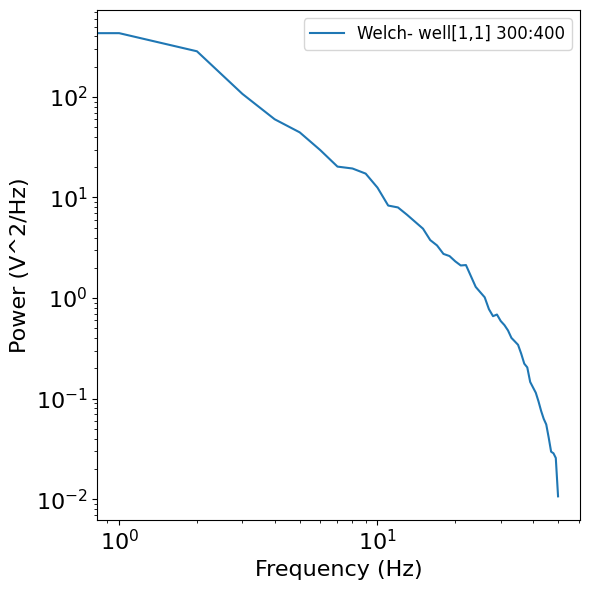

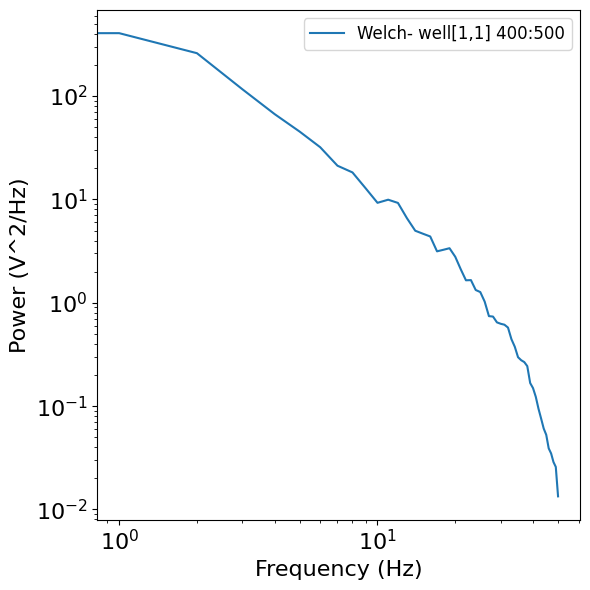

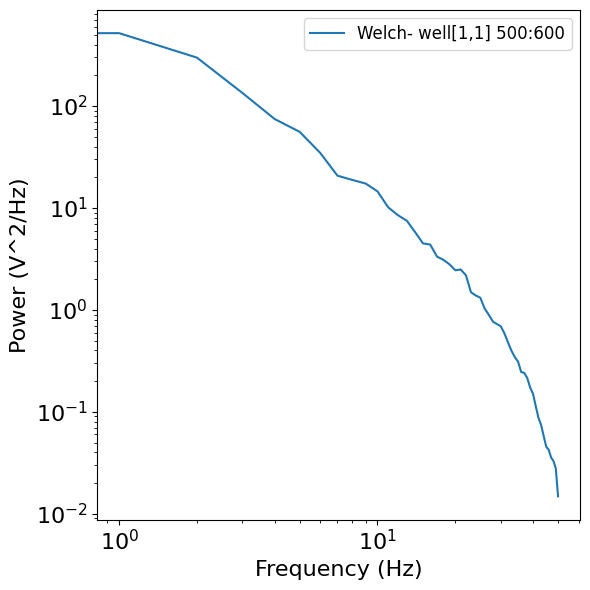

In [11]:
ndsp_wind_thresh(binary_activity, lfp_data, 100)

## Variation of FoooF Parameters

In [12]:
fm_array = set_fm_array(lfp_data)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a low

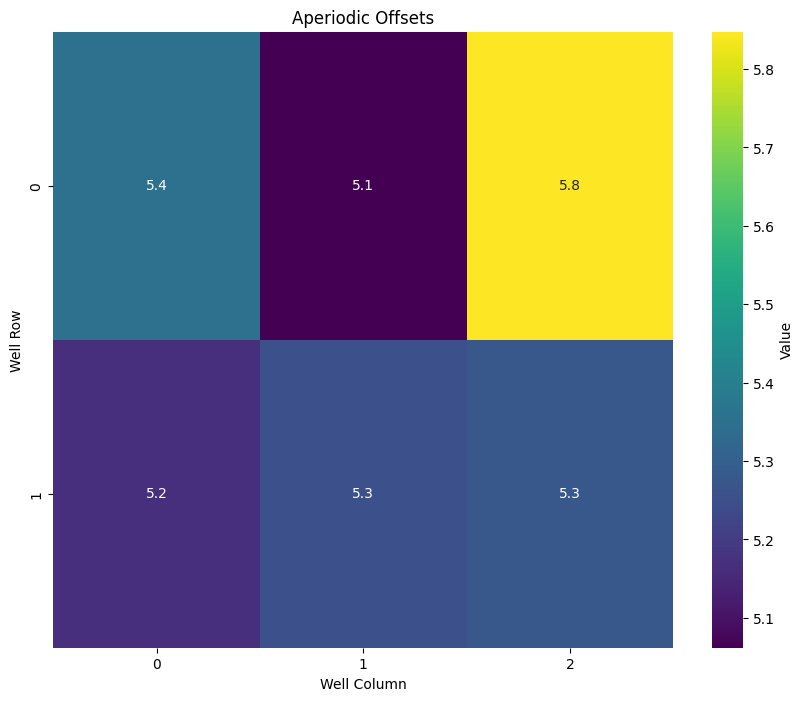

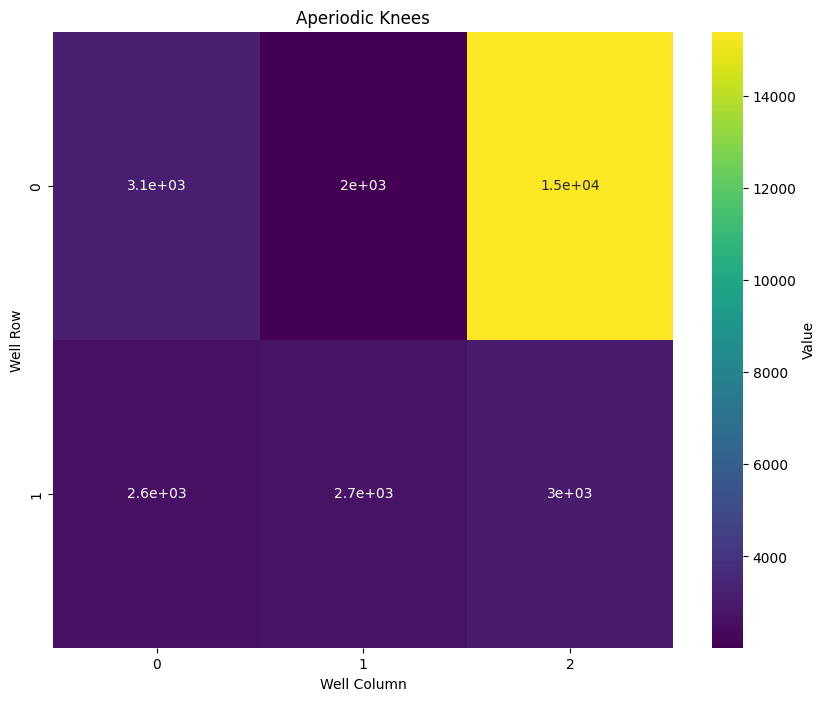

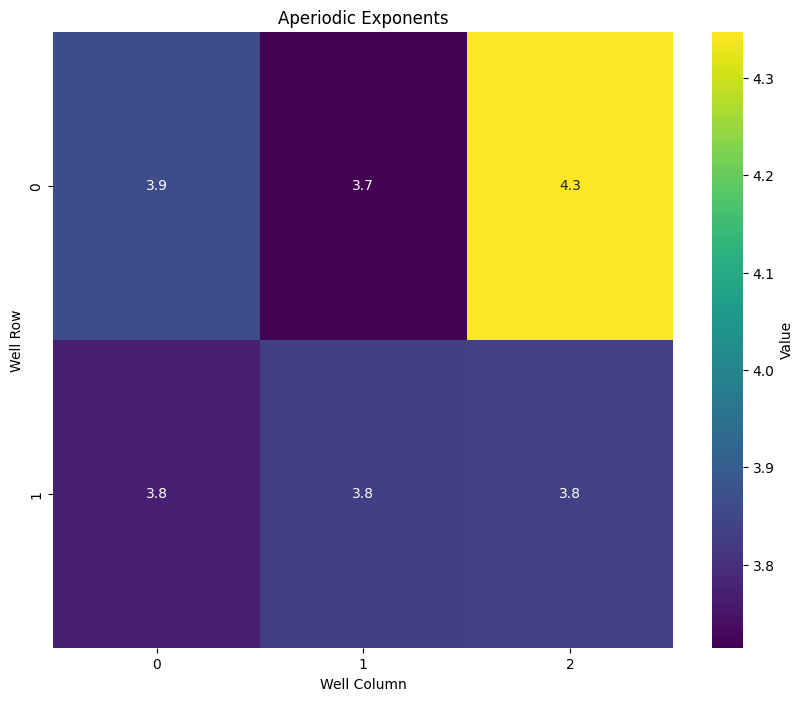

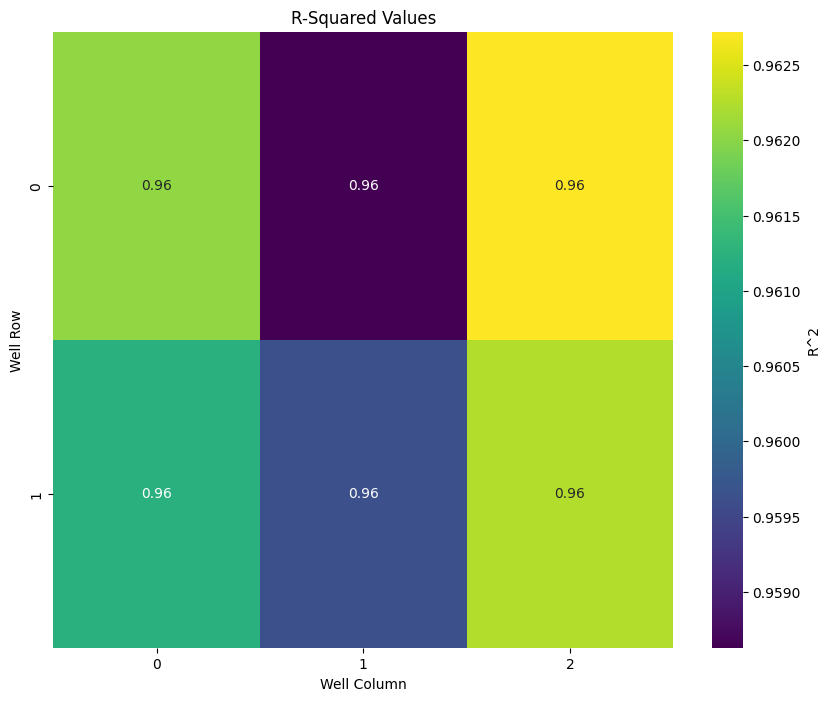

In [13]:
param_heatmap(fm_array)

In [14]:
dose_grid = np.array([
    ['eGFP', 'eGFP', 'eGFP'],
    ['CheRiff', 'CheRiff', 'CheRiff']])

C:\Users\david\Documents\Voytek Research\psychedelic_organoids\PlateA\A_LFP_analysis_functions.py:652: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")


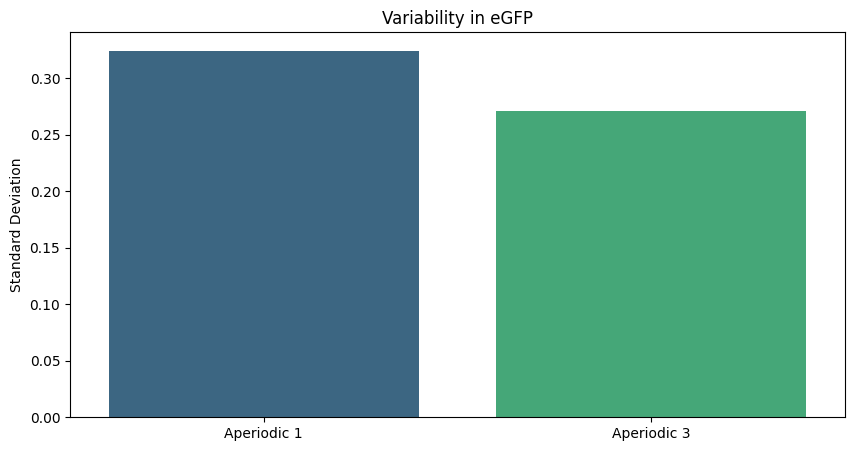

C:\Users\david\Documents\Voytek Research\psychedelic_organoids\PlateA\A_LFP_analysis_functions.py:652: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")


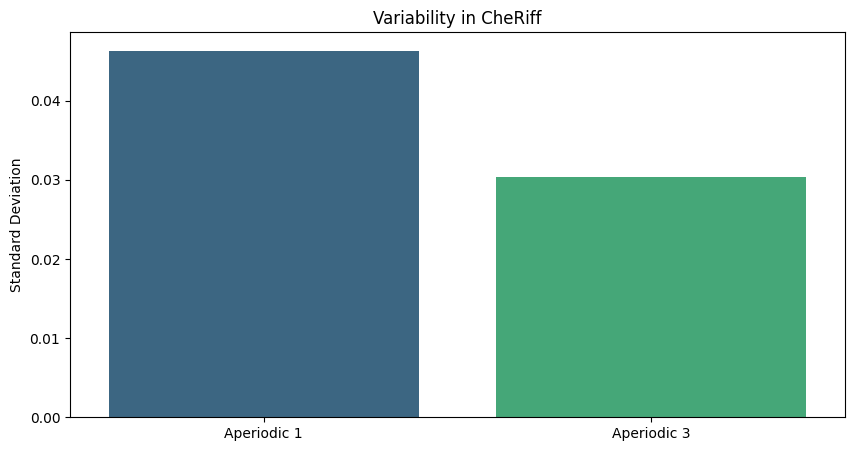

In [15]:
plot_variability(fm_array, dose_grid)

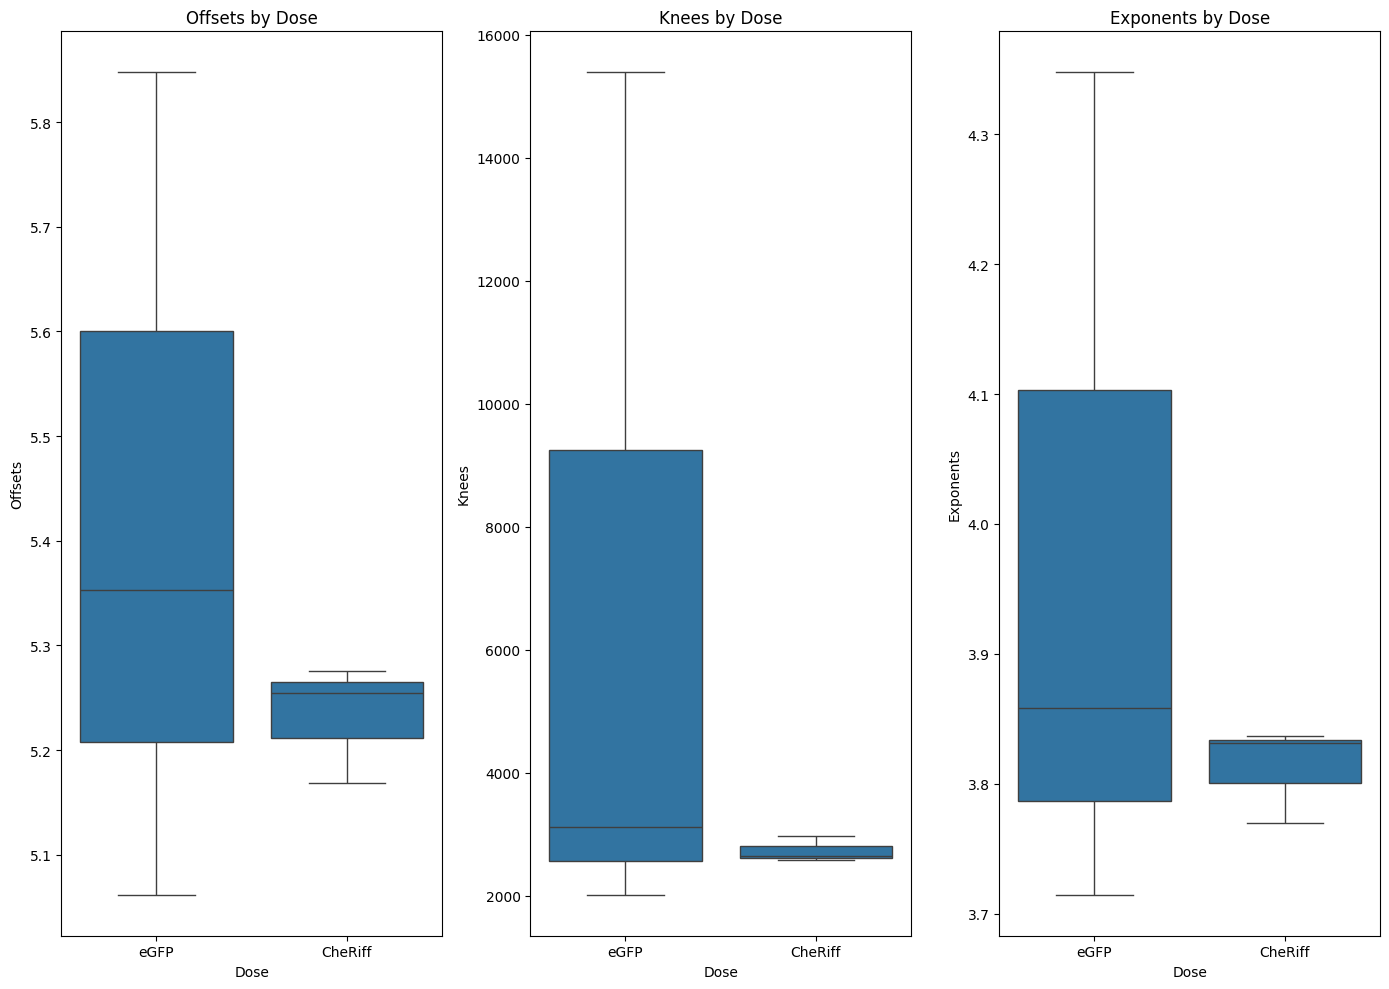

In [16]:
plot_aperiodic_boxplot(fm_array,  dose_grid)

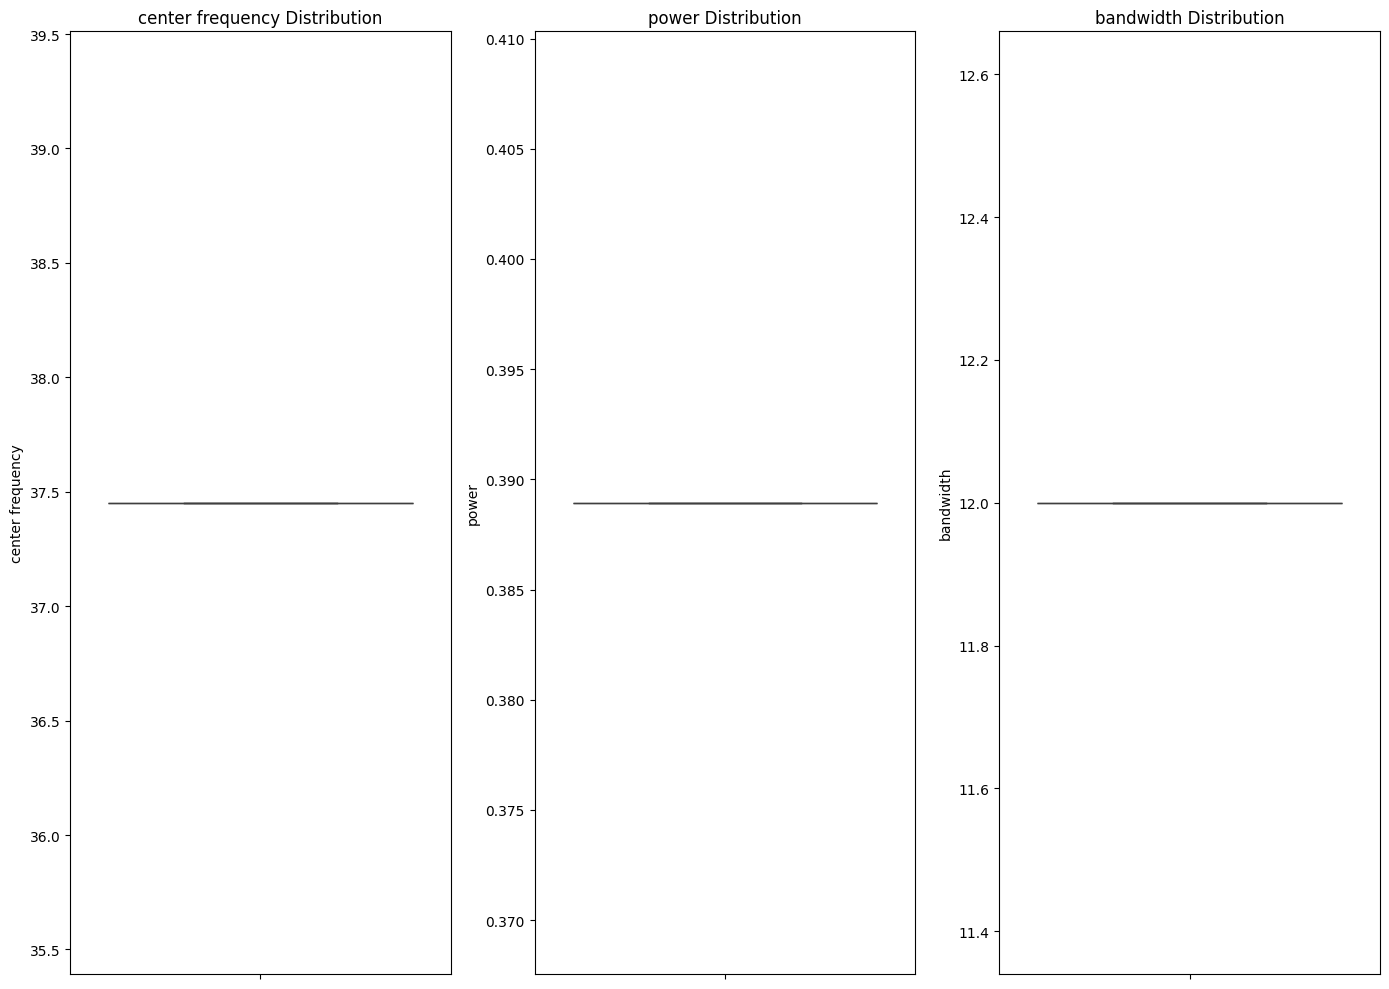

In [17]:
 plot_peak_boxplot(fm_array,  dose_grid)